<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Lecture_1_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<font size="6">Искусственный интеллект</font>

<font size="5">Что это такое?</font>

**Искусственный интеллект (ИИ)** — это область компьютерных наук, занимающаяся созданием систем, способных выполнять задачи, которые требуют интеллекта, характерного для человека. Это включает в себя такие способности, как понимание естественного языка, решение проблем, обучение, восприятие и принятие решений. Искусственный интеллект может быть как узким (специализированным в одной области, например, распознавание лиц), так и общим (способным выполнять широкий спектр задач, как человек).

<font size="6">Машинное обучение</font>

<font size="5">Что это такое?</font>

**Машинное обучение** — это подполе искусственного интеллекта, которое позволяет компьютерам обучаться и делать прогнозы или принимать решения на основе данных без явного программирования. Алгоритмы машинного обучения используются для анализа данных, выявления паттернов и принятия обоснованных решений на их основе.

Как описал Том Митчелл в своей книге *Machine Learning* (1997), "Компьютерная программа обучается на основе опыта E в отношении некоторого класса задач T и некоторой меры эффективности P, если эффективность программы при решении задач из T, измеряемая с помощью P, повышается с опытом E." Это определение подчеркивает, что машинное обучение базируется на итеративном процессе улучшения результатов.

В машинном обучении выделяют три основных типа задач: регрессия, классификация и кластеризация.

* **Регрессия** — это задача, в которой модель стремится предсказать непрерывное значение на основе имеющихся данных. Например, предсказание цены недвижимости на основе характеристик дома, таких как площадь, количество комнат и местоположение.

* **Классификация** — это задача, в которой модель определяет, к какой категории или классу принадлежит объект, исходя из его признаков. Например, классификация электронных писем на спам и не спам.

* **Кластеризация** — это задача, в которой модель группирует объекты на основе их сходства без предварительных меток классов. Это может быть полезно для сегментации потребителей, чтобы выявить различные рыночные сегменты.

Каждый из этих типов задач имеет свои методы и подходы для решения, такие как линейные регрессии для задач регрессии, деревья решений и методы опорных векторов для классификации, а также алгоритмы, основанные на расстоянии, для кластеризации. Понимание этих задач и методов является ключом к успешному применению машинного обучения в различных областях, таких как финансы, медицина, маркетинг и многие другие.



# Линейные модели

Линейные модели - это класс моделей в статистике и машинном обучении, которые предполагают линейную зависимость между входными переменными и выходом. В таких моделях предполагается, что выходное значение можно выразить как линейную комбинацию входных переменных с определенными весами (коэффициентами). Примерами линейных моделей являются линейная регрессия, логистическая регрессия и метод опорных векторов (SVM) с линейным ядром.

Представим, что у нас есть множество объектов $\mathbb{X}$, и вы хотите каждому объекту сопоставить какое-то значение. Например, у вас есть набор операций по банковской карте, и вы хотите определить, какие из этих операций сделали мошенники. Если вы разделите все операции на два класса и обозначите законные действия нулём, а мошеннические единицей, то у вас получится простейшая задача классификации.

Рассмотрим другую ситуацию: у вас есть данные геологоразведки, по которым вы хотите оценить перспективы различных месторождений. В данном случае по набору геологических данных ваша модель будет, например, оценивать потенциальную годовую доходность шахты. Это пример задачи регрессии. Числа, которые мы хотим сопоставить объектам из нашего множества, являются предсказаниями модели на основе имеющихся данных.

Давайте рассмотрим еще один пример: предположим, у вас есть данные о различных характеристиках квартир, таких как площадь, количество комнат, удаленность от центра города, наличие парков, магазинов и других факторов. Вы хотите оценить стоимость квартиры на основе этих данных. В этом случае ваша модель, например, линейная регрессия, будет использоваться для предсказания цены квартиры. Модель будет строить линейную зависимость между характеристиками квартиры и ее ценой, выражая цену как линейную комбинацию этих характеристик с определенными весами. Таким образом, числа, которые модель будет предсказывать на основе доступных данных, будут служить оценкой цены на квартиру в данном случае.


Таким образом, задачи классификации и регрессии можно сформулировать как поиск отображения из множества объектов $\mathbb{X}$ в множество возможных таргетов.

Математически задачи можно описать следующим образом:

- для классификации: $\mathbb{X} \rightarrow 0,1, ... , K$, где K – номера классов,
- для регрессии: $\mathbb{X} \rightarrow \mathbb{R}.$

Очевидно, что просто сопоставить какие-то объекты каким-то числам — дело довольно бессмысленное. Мы же хотим быстро обнаруживать мошенников или принимать решение, где строить шахту. Значит, нам нужен какой-то критерий качества. Мы бы хотели найти такое отображение, которое лучше всего приближает истинное соответствие между объектами и таргетами. Что означает «лучше всего» – вопрос сложный, к которому мы будем много раз возвращаться. Однако есть более простой вопрос: среди каких отображений мы будем искать самое лучшее решение? Возможных отображений может быть много, но мы можем упростить себе задачу и договориться, что хотим искать решение только в каком-то заранее заданном параметризированном семействе функций. На первом этапе для линейных моделей рассмотрим самое простое семейство — линейных функций вида:

$$
y = w_1 x_1 + \ldots + w_D x_D + w_0,
$$

где
$y$– целевая переменная (таргет), $x=(x_1, \ldots, x_D)-$   вектор, соответствующий объекту выборки (вектор признаков), а $w_1, \ldots, w_D, w_0$
 – параметры модели. Признаки ещё называют фичами (от английского features). Вектор $w = (w_1,\ldots,w_D)$
 часто называют вектором весов, так как на предсказание модели можно смотреть как на взвешенную сумму признаков объекта, а число $w_0-$
  свободным коэффициентом, или сдвигом (bias).

Более компактно линейную модель можно записать в виде

$$
  y = \langle x, w\rangle + w_0
  $$

Теперь, когда мы выбрали семейство функций, в котором будем искать решение, задача стала существенно проще. Мы теперь ищем не какое-то абстрактное отображение, а конкретный вектор
$(w_0,w_1,\ldots,w_D)\in\mathbb{R}^{D+1}$.


**Замечание.** *Чтобы применять линейную модель, нужно, чтобы каждый объект уже был представлен вектором численных признаков $x_1, \ldots, x_D$
. Конечно, просто текст или граф в линейную модель не положить, придётся сначала придумать для него численные фичи. Модель называют линейной, если она является линейной по этим численным признакам.*


**Вопрос на подумать.** А как быть, если одна из фичей является категориальной, то есть принимает значения из (обычно конечного числа) значений, не являющихся числами? Например, это может быть время года, уровень образования, марка машины и так далее. Как правило, с такими значениями невозможно производить арифметические операции или же результаты их применения не имеют смысла.





**Ответ.**
В линейную модель можно подать только численные признаки, так что категориальную фичу придётся как-то закодировать. Рассмотрим для примера вот такой датасет.


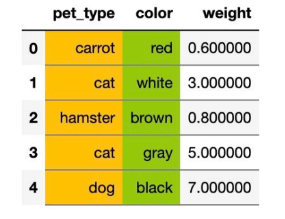

Здесь два категориальных признака – **pet_type** и **color**. Первый принимает четыре различных значения, второй – пять.

Самый простой способ – использовать one-hot кодирование (one-hot encoding). Пусть исходный признак мог принимать M
 значений $c_1,\ldots, c_M.$ Давайте заменим категориальный признак на M
 признаков, которые принимают значения
0 и 1:$i$-й будет отвечать на вопрос «принимает ли признак значение
$c_i$?». Иными словами, вместо ячейки со значением $c_i$
 у объекта появляется строка нулей и единиц, в которой единица стоит только на
$i$-м месте.

В нашем примере получится вот такая табличка:

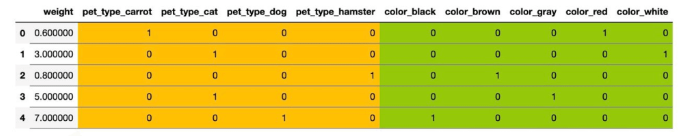

Можно было бы на этом остановиться, но добавленные признаки обладают одним неприятным свойством: в каждом из них ровно одна единица, так что сумма соответствующих столбцов равна столбцу из единиц. А это уже плохо. Представьте, что у нас есть линейная модель:
$$y \sim w_1x_1 + \ldots + w_{D-1}x_{D-1} + w_{c_1}x_{c_1} + \ldots + w_{c_M}x_{c_M} + w_0$$

Преобразуем немного правую часть:
$$y\sim w_1x_1 + \ldots + w_{D-1}x_{d-1} + \underbrace{(w_{c_1} - w_{c_M})}_{=:w'_{c_1}}x_{c_1} + \ldots + \underbrace{(w_{c_{M-1}} - w_{c_M})}_{=:w'_{C_{M-1}}}x_{c_{M-1}} + w_{c_M}\underbrace{(x_{c_1} + \ldots + x_{c_M})}_{=1} + w_0 = w_1x_1 + \ldots + w_{D-1}x_{d-1} + w'_{c_1}x_{c_1} + \ldots + w'_{c_{M-1}}x_{c_{M-1}} + \underbrace{(w_{c_M} + w_0)}_{=w'_{0}}$$

Как видим, от одного из новых признаков можно избавиться, не меняя модель. Больше того, это стоит сделать, потому что наличие «лишних» признаков ведёт к переобучению или вовсе ломает модель – подробнее об этом мы поговорим в разделе про регуляризацию. Поэтому при использовании one-hot-encoding обычно выкидывают признак, соответствующий одному из значений. Например, в нашем примере итоговая матрица объекты-признаки будет иметь вид:

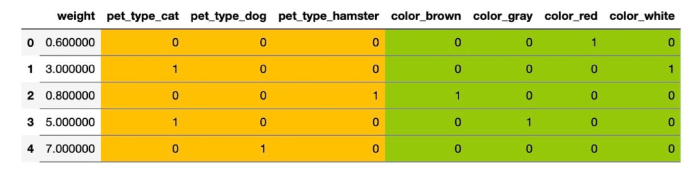

Помимо простоты, у линейных моделей есть несколько других достоинств. К примеру, мы можем достаточно легко судить, как влияют на результат те или иные признаки. Скажем, если вес $w+i$
 положителен, то с ростом $i$
-го признака таргет в случае регрессии будет увеличиваться, а в случае классификации наш выбор будет сдвигаться в пользу одного из классов. Значение весов тоже имеет прозрачную интерпретацию: чем вес $w+i$
 больше, тем «важнее» $i$
-й признак для итогового предсказания. То есть, если вы построили линейную модель, вы неплохо можете объяснить заказчику те или иные её результаты. Это качество моделей называют интерпретируемостью. Оно особенно ценится в индустриальных задачах, цена ошибки в которых высока. Если от работы вашей модели может зависеть жизнь человека, то очень важно понимать, как модель принимает те или иные решения и какими принципами руководствуется. При этом не все методы машинного обучения хорошо интерпретируемы, к примеру, поведение искусственных нейронных сетей или градиентного бустинга интерпретировать довольно сложно.

В то же время слепо доверять весам линейных моделей тоже не стоит по целому ряду причин:

- Линейные модели всё-таки довольно узкий класс функций, они неплохо работают для небольших датасетов и простых задач. Однако, если вы решаете линейной моделью более сложную задачу, то вам, скорее всего, придётся выдумывать дополнительные признаки, являющиеся сложными функциями от исходных. Поиск таких дополнительных признаков называется feature engineering, технически он устроен примерно так, как мы описали в вопросе про "полиномиальные модели". Вот только поиском таких искусственных фичей можно сильно увлечься, так что осмысленность интерпретации будет сильно зависеть от здравого смысла эксперта, строившего модель.
- Если между признаками есть приближённая линейная зависимость, коэффициенты в линейной модели могут совершенно потерять физический смысл (об этой проблеме и о том, как с ней бороться, мы поговорим дальше, когда будем обсуждать регуляризацию).
- Особенно осторожно стоит верить в утверждения вида «этот коэффициент маленький, значит, этот признак не важен». Во-первых, всё зависит от масштаба признака: вдруг коэффициент мал, чтобы скомпенсировать его. Во-вторых, зависимость действительно может быть слабой, но кто знает, в какой ситуации она окажется важна. Такие решения принимаются на основе данных, например, путём проверки статистического критерия (об этом мы коротко упомянем в разделе про вероятностные модели).
- Конкретные значения весов могут меняться в зависимости от обучающей выборки, хотя с ростом её размера они будут потихоньку сходиться к весам «наилучшей» линейной модели, которую можно было бы построить по всем-всем-всем данным на свете.


## Линейная регрессия.

**Регрессия** — это одна из трех базовых задач машинного обучения (классификация, регрессия, кластеризация), который используется для построения модели, предсказывающей зависимую переменную на основе одной или нескольких независимых переменных. Основная идея линейной регрессии заключается в том, чтобы найти линейную зависимость между входными данными и целевой переменной.

В случае простой линейной регрессии у нас есть одна независимая переменная, а в множественной линейной регрессии — несколько. Модель линейной регрессии стремится подобрать коэффициенты (веса) перед каждой независимой переменной таким образом, чтобы минимизировать среднеквадратичную ошибку между предсказанными значениями и реальными данными.

Линейная регрессия является одним из наиболее простых и часто используемых методов в ML для решения задачи регрессии, когда требуется предсказать числовую величину.




**Определение.** Задача предсказания значения одной или нескольких целевых переменных (англ. **target variable**) на основе D-мерного вектора х входных переменных (англ. **input variables**) называется задачей регрессии.


В задаче **регрессии** мы используем входные **признаки**, чтобы предсказать **целевые значения**. Например, чтобы предсказать цену жилья по его характеристикам (площадь, этаж, год постройки дома, высота потолков, район, ...). **Линейная регрессия** сводится к тому, чтобы провести “**линию наилучшего соответствия**” через набор точек данных.

## Данные


В машинном обучении данные обычно называются датасетом. В линейной простой регрессии датасет представляет собой набор данных, который содержит информацию о переменных, используемых для обучения модели. В контексте линейной регрессии, датасет состоит из пар значений (x, t), где x - входные переменные (предикторы), а t - целевая переменная (зависимая переменная), которую модель пытается предсказать на основе входных данных.

 Датасет включает в себя наблюдения или примеры, где каждое наблюдение представляет собой один ряд данных, состоящий из значений зависимой переменной и значений независимых переменных. Эти данные используются для обучения модели линейной регрессии, чтобы она могла выучить зависимости между признаками и целевой переменной и затем использовать эту информацию для предсказания значений целевой переменной для новых данных.


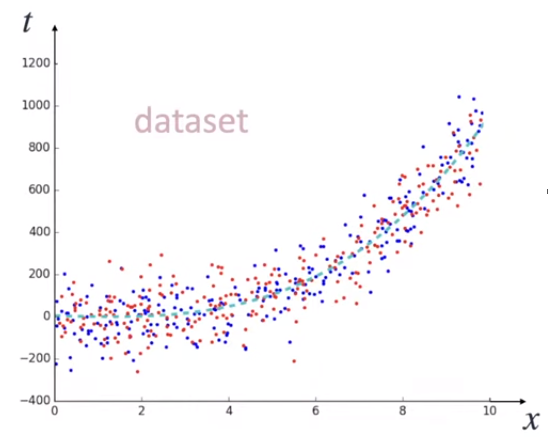

В датасете для машинного обучения обычно выделяют три основных подмножества данных:

* Обучающая выборка (Training set): Это подмножество данных, которое используется для обучения модели. Модель "учится" на этих данных путем подбора параметров и поиска закономерностей в данных.
* Валидационная выборка (Validation set): Это подмножество данных, которое используется для настройки гиперпараметров модели и оценки ее производительности во время обучения. Валидационная выборка помогает выбирать лучшую модель из нескольких вариантов и предотвращает переобучение.
* Тестовая выборка (Test set): Это отдельное подмножество данных, которое не используется ни во время обучения, ни во время настройки гиперпараметров. Она используется для окончательной оценки производительности модели после завершения обучения. Тестовая выборка позволяет оценить, насколько хорошо модель будет работать на новых, ранее не виденных данных.

Разделение датасета на эти три части помогает оценить производительность модели и ее способность обобщаться на новые данные.

Обычно применяют следующее соотношение для разделения датасета на обучающую, валидационную и тестовую выборки:

* Обучающая выборка: Примерно 60-80% от всего датасета.
* Валидационная выборка: Обычно отводят 10-20% от всего датасета.
* Тестовая выборка: Около 10-20% от всего датасета.

Эти процентные соотношения могут варьироваться в зависимости от размера и характера данных, а также от конкретной задачи машинного обучения.


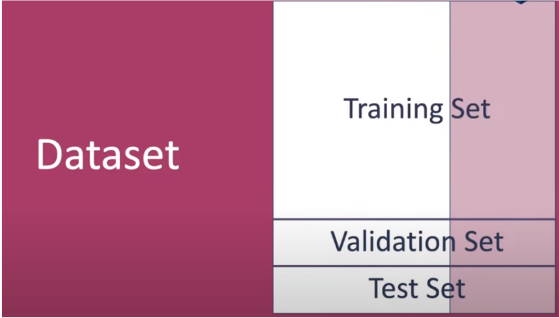

## Постановка задачи регрессия
Предположим, что значение целевой переменной $t$ для входного векторах определяется значением детерминированной функции $у(х, w)$ с аддитивным Гауссовым шумом $\varepsilon$

$$t = y(x, w) +ɛ,  \quad ɛ \sim Ν(0, σ^2)$$

Тогда
$$p(t|x, w, o²) = N(y(x, w), σ²)$$

Это уравнение описывает модель регрессии, которая предполагает, что целевая переменная $t$ зависит от входного вектора $x$ через детерминированную функцию $y(x, w)$, где $w$ - параметры модели. Однако, так как в реальных данных всегда присутствует некоторый уровень шума или случайной ошибки, в уравнение добавляется Гауссовый шум $\varepsilon$, который имеет нормальное распределение с математическим ожиданием 0 и дисперсией $\sigma^2$.

Итак, уравнение $t = y(x, w) + \varepsilon$ показывает, что значение целевой переменной $t$ равно значению функции $y(x, w)$ плюс случайный шум. Затем, вероятность получить конкретное значение $t$ при заданных $x$, $w$ и $\sigma^2$ описывается нормальным распределением с математическим ожиданием $y(x, w)$ и дисперсией $\sigma^2$.

Это позволяет модели регрессии учитывать случайные ошибки в данных и оценивать вероятностное распределение значений целевой переменной с учетом шума.

Стоить отметить, что в общем случае дисперсия ошибки
$σ^2$  в модели регрессии считается постоянной. Однако, если вы обнаружите, что дисперсия ошибки зависит от значений предиктора $x$, это может указывать на **гетероскедастичность**. В таких случаях можно использовать методы, которые учитывают эту зависимость для более точного моделирования данных.

**Гетероскедастичность** - это статистический термин, который означает наличие неравномерной изменчивости дисперсии ошибок в регрессионной модели. В случае гетероскедастичности дисперсия ошибок не остается постоянной по всем значениям независимой переменной, что может привести к недопустимым выводам при оценке коэффициентов регрессии. Для корректного анализа данных важно учитывать и корректировать гетероскедастичность при построении моделей.

## Построение функции y(x,w)

В задачах регрессии требуется построиь функция вида $$y(x,w) ⟶R$$
где $w-$ вектор параметров функции, $x-$ вектор характеристик.
Вид функции y подбирается заранее. Параметр $w$  вычисляются в результате обучения.

Рассмотрим известный нам вид функции $y(x, w)$:
$$y(x,w) = w_0+w_1 x_1 + \ldots + w_D x_D=w_0+\sum_{i=1}^D w_i\cdot x_i$$

где
$y(x,w)$– целевая переменная (таргет), $x=(x_1, \ldots, x_D)-$   вектор, соответствующий объекту выборки (вектор признаков), а $w_1, \ldots, w_D, w_0$
 – параметры модели. Признаки ещё называют фичами (от английского features). Вектор $w = (w_1,\ldots,w_D)$
 часто называют вектором весов, так как на предсказание модели можно смотреть как на взвешенную сумму признаков объекта, а число $w_0-$
  свободным коэффициентом, или сдвигом (bias).


**Примечание.** Свободный член $w_0$
 часто опускают, потому что такого же результата можно добиться, добавив ко всем $x_i$
 признак, тождественно равный единице; тогда роль свободного члена будет играть соответствующий ему вес:

 $$
 \begin{pmatrix}x_{1} & \ldots & x_{D} \end{pmatrix}\cdot\begin{pmatrix}w_1\\ \vdots \\ w_D\end{pmatrix} + w_0 =
\begin{pmatrix}1 &  x_{i} & \ldots & x_{D} \end{pmatrix}\cdot\begin{pmatrix}w_0 \\ w_1\\ \vdots \\ w_D \end{pmatrix}
 $$






## Базисные функции (Basis Function)

Базисные функции в линейной регрессии представляют собой функции, которые используются для преобразования исходных признаков (например, входных переменных) в новое пространство признаков. Они помогают модели линейной регрессии адаптироваться к сложным нелинейным зависимостям между входными данными и целевой переменной. Базисные функции могут быть полиномиальными, тригонометрическими, экспоненциальными и т. д. Они позволяют модели лучше соответствовать данным путем создания новых признаковых комбинаций, которые могут быть более подходящими для описания сложных взаимосвязей в данных.

Интерес  представляет более широкой класс моделей:

$$y(x,w) = w_0+\sum_{j=1}^{M-1} w_j\cdot \phi_j(x)=w^T\phi(x)$$

где $$\phi(x)=(ϕ_0(x), ϕ_1(x), ..., ϕ_M-1(x))^T, \quad  \phi_0(x)=1$$

$$w=(w_0,w1, ..., w_{M-1})^T$$


Введение базисных функций в модель линейной регрессии может быть необходимо по нескольким причинам:

1. **Моделирование сложных зависимостей:** Базисные функции позволяют моделировать сложные нелинейные зависимости между входными признаками и целевой переменной, что делает модель более гибкой и способной адаптироваться к разнообразным данным.

2. **Улучшение предсказательной способности:** Путем использования базисных функций можно улучшить способность модели лучше соответствовать данным и делать более точные прогнозы.

3. **Уменьшение ошибки модели:** Введение подходящих базисных функций может помочь уменьшить ошибку модели, улучшив ее способность описывать данные.

4. **Обобщение модели:** Базисные функции позволяют модели лучше обобщать на новые данные, даже если зависимости в данных не являются линейными.

Таким образом, введение базисных функций в линейную регрессионную модель может быть необходимым для улучшения ее способности адаптироваться к различным типам данных и делать точные прогнозы.

Приведем несколько примеров базисных функций, которые могут использоваться в линейной регрессии:

1. **Полиномиальные базисные функции:**
   Полиномиальные базисные функции могут быть использованы для моделирования нелинейных зависимостей.
   Пример:
   $$ \phi(x) = (1, x, x^2, x^3, \ldots) $$

2. **Радиально-базисные функции (RBF):**
   Радиально-базисные функции могут быть полезны для аппроксимации сложных нелинейных зависимостей.
   Пример:
   $$ \phi(x) = (e^{-\frac{(x - \mu_1)^2}{2\sigma^2}}, e^{-\frac{(x - \mu_2)^2}{2\sigma^2}}, \ldots) $$

3. **Синусоидальные базисные функции:**
   Синусоидальные базисные функции могут быть полезны для анализа периодических данных.
   Пример:
   $$ \phi(x) = (\sin(\omega_1 x), \cos(\omega_1 x), \sin(\omega_2 x), \cos(\omega_2 x), \ldots) $$

Это лишь некоторые примеры базисных функций, которые могут быть использованы в линейной регрессии для моделирования различных типов зависимостей в данных.

Давайте рассмотрим два варианта модификации модели линейной регрессии с использованием базисных функций:

**Линейная регрессия:**
В случае линейной регрессии с базисными функциями, модель остается линейной относительно параметров w, но базисные функции позволяют учесть нелинейные зависимости между признаками и целевой переменной.
$$\phi_1(x)=x_1, \phi_2(x)=x_2, ..., \phi_D(x)=x_D. $$

**Полиномиальная регрессия с одной переменной:**
Полиномиальная регрессия с одной переменной представляет собой модификацию линейной регрессии, где в качестве базисных функций используются степени исходной переменной.
$$\phi_1(x)=x, \phi_2(x)=x^2, ..., \phi_K(x)=x^K. $$



Для лучшего понимания давайте рассмотрим еще один вариант уравнения полиномиальной регрессии с одной переменной (второй степени) с использованием базисных функций
 $ \phi $:

$$ y(x, w) = w_0 + w_1 \cdot \phi_1(x) + w_2 \cdot \phi_2(x) $$

В данном контексте $\phi$ представляет собой вектор базисных функций, который преобразует исходную переменную $x$ в новое пространство признаков. В случае полиномиальной регрессии с одной переменной (второй степени), базисные функции $\phi$ включают в себя константу, саму переменную $x$ и квадрат переменной $x^2$. Таким образом, $\phi(x) = (1, x, x^2)$ в данном случае.

## Матрица плана (Desifn Matrix)

Матрица плана (Design Matrix) в линейной регрессии представляет собой матрицу, которая содержит значения всех независимых переменных (факторов) модели. Каждая строка матрицы соответствует одному наблюдению, а каждый столбец представляет собой один из факторов или базисную функцию.

Обычно матрица плана обозначается как $ X $ и имеет размерность $ n \times (p+1) $, где $ n $ - количество наблюдений, $ p $ - количество факторов (включая константу).

Формально, матрица плана выглядит следующим образом:
$$ X = \begin{bmatrix} 1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 1 & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{np} \end{bmatrix} $$

Здесь первый столбец - это столбец констант (bias term), а остальные столбцы представляют значения факторов или базисных функций для каждого наблюдения. Матрица плана используется для оценки параметров модели линейной регрессии с помощью метода наименьших квадратов.

Матрица плана (Design Matrix) в линейной регрессии используется для оценки параметров модели. Она необходима для формализации связи между независимыми переменными и зависимой переменной в модели линейной регрессии. Вот несколько причин, почему матрица плана важна:

1. **Оценка параметров:** С помощью матрицы плана можно оценить параметры модели (веса) с использованием метода наименьших квадратов, который минимизирует сумму квадратов разностей между наблюдаемыми значениями и предсказаниями модели.

2. **Учет множественных факторов:** Матрица плана позволяет учитывать влияние нескольких независимых переменных на зависимую переменную, что делает модель более гибкой и способной описывать сложные взаимосвязи.

3. **Проверка статистической значимости:** С помощью матрицы плана можно проводить статистические тесты на значимость коэффициентов модели и оценивать статистическую значимость влияния факторов на зависимую переменную.

Таким образом, матрица плана играет ключевую роль в построении и анализе модели линейной регрессии, помогая оценить параметры модели и интерпретировать влияние факторов на целевую переменную.

Матрица плана (Design Matrix) с учетом базисных функций в линейной регрессии представляет собой матрицу, в которой каждый столбец соответствует базисной функции или фактору, используемому для моделирования зависимости между независимыми переменными и целевой переменной.

При использовании базисных функций, матрица плана выглядит следующим образом:
$$ Φ(x)= \begin{bmatrix} \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n) \end{bmatrix} $$

Здесь каждая строка представляет одно наблюдение, а столбцы соответствуют базисным функциям, примененным к соответствующим независимым переменным $ x_i $.

Матрица плана с учетом базисных функций играет важную роль в моделировании сложных зависимостей, позволяя учесть нелинейные взаимосвязи между переменными и строить более гибкие модели линейной регрессии.

Давайте рассмотрим конкретный пример линейной регрессии с использованием матрицы плана.

Предположим, у нас есть следующий набор данных с двумя независимыми переменными $ x_1 $ и $ x_2 $ и зависимой переменной $ y $:

| \( x_1 \) | \( x_2 \) | \( y \) |
|----------|----------|-------|
|   1      |   2      |  3    |
|   2      |   3      |  5    |
|   3      |   4      |  7    |

Мы будем использовать линейную модель с уравнением:
$$ y = w_0 + w_1x_1 + w_2x_2$$

Теперь давайте построим матрицу плана \( X \) и найдем параметры \( w \):

Матрица плана:
$$ X = \begin{bmatrix} 1 & 1 & 2 \\ 1 & 2 & 3 \\ 1 & 3 & 4 \end{bmatrix} $$

Вектор параметров:
$$ w = (w_0, w_1, w_2)^T $$

Модель может быть представлена в матричной форме как:
$$ Y = Xw + \varepsilon $$

Где:
- $ Y = (3, 5, 7)^T $ - вектор наблюдаемых значений,
- $ \varepsilon $ представляет ошибку.

По позьже приведем конкретный пример.

## Функция правдоподобия (Likehood)

Функция правдоподобия (Likelihood) в линейной регрессии используется для оценки того, насколько вероятно наблюдать имеющиеся данные при определенных значениях параметров модели. В линейной регрессии обычно предполагается, что остатки распределены нормально.

Для простоты, предположим, что наблюдения $ t_i $ имеют нормальное распределение с математическим ожиданием $ y(x, w)$ и дисперсией $ \sigma^2 $. Тогда функция правдоподобия для одного наблюдения будет иметь вид функции плотности вероятности нормального распределения:
$$ L(y_i | x_i, w) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}} $$

Полная функция правдоподобия для всех наблюдений в выборке будет произведением функций правдоподобия для каждого наблюдения:
$$ L(y | X, w) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t_i - y(x_i, w))^2}{2\sigma^2}} $$



Принцип максимального правдоподобия (Maximum Likelihood) в линейной регрессии заключается в поиске таких значений параметров $w$, при которых вероятность получить имеющиеся наблюдения $t$ будет максимальной, учитывая предположения о нормальном распределении ошибок.

В линейной регрессии предполагается, что ошибки имеют нормальное распределение со средним значением, равным 0, и дисперсией $\sigma^2 $. При добавлении значения $y(x, w)$ к нормальному распределению, оно сдвигается на это значение влево или вправо. Таким образом, переменная $t = y(x, w) + \varepsilon$ имеет такое же нормальное распределение.

Это означает, что $ t$ имеет нормальное распределение с математическим ожиданием $ y(x, w)$ и дисперсией $ \sigma^2$:
$$ t \rightarrow N(y(x, w), \sigma^2)$$

Этот принцип позволяет нам оценить параметры модели линейной регрессии, максимизируя вероятность получить имеющиеся наблюдения при определенных значениях параметров $ w $.


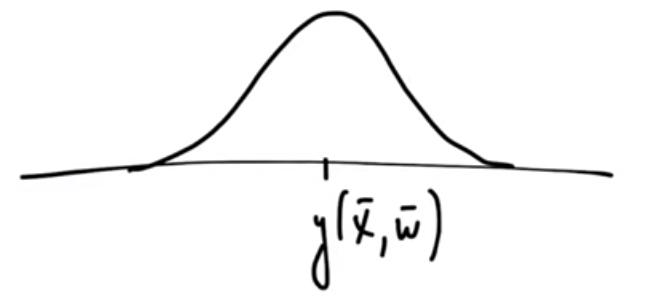

С учетом базисной функции, функция правдоподобия в более общем виде для линейной регрессии может быть записана следующим образом:

$$p(t|X,w, \sigma^2) = \prod_{i=1}^{N} N(t_i|w^T \phi(x_i), \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}} $$

Эта функция правдоподобия представляет вероятность наблюдать значения целевой переменной $ t=(t_1, t_2, ...,t_N)^T $ при условии матрицы плана $ X=\{x_1, x2,...,x_n\} $, параметров $ w $ и дисперсии $ \sigma^2 $ в контексте линейной регрессии с базисными функциями. Она является произведением нормальных распределений для каждого наблюдения, где среднее значение задано как $ w^T \phi(x_i) $, а дисперсия равна $ \sigma^2 $.


Для нахождения целевой функции, которую нужно максимизировать для оценки параметров модели линейной регрессии с базисными функциями, мы берем логарифм от функции правдоподобия по нескольким причинам:

1. **Упрощение умножения в суммирование:** Логарифм позволяет преобразовать произведение вероятностей в сумму логарифмов, что упрощает вычисления и предотвращает потерю точности при работе с малыми вероятностями.

2. **Удобство оптимизации:** Логарифмическая функция правдоподобия обычно имеет более гладкую форму и легче оптимизируется, так как минимизация логарифмической функции равносильна максимизации исходной функции правдоподобия.

3. **Интерпретация:** Логарифмирование не изменяет максимум функции правдоподобия, поэтому максимизация логарифма дает те же оценки параметров, что и максимизация исходной функции правдоподобия.



## Вычисление параметров модели (Estimating Model Parameters)

Для вычисления параметров модели в линейной регрессии с использованием метода максимального правдоподобия и функции правдоподобия нам необходимо определить логарифмическую функцию правдоподобия:

$$
\ln(p(t|X,w, \sigma^2)) = \ln\left(\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi \sigma^2}} \cdot e^{-\frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}}\right).
$$

Согласно правилу логарифмирования $\ln(a \cdot b) = \ln a + \ln b$, можно переписать данное уравнение как:

$$
\ln(p(t|X,w, \sigma^2)) = \sum_{i=1}^{N} \left[\ln\left(\frac{1}{\sqrt{2\pi \sigma^2}}\right) - \frac{(t_i - w^T \phi(x_i))^2}{2\sigma^2}\right].
$$

Это уравнение можно упростить следующим образом:

$$
= \sum_{i=1}^{N} \ln\left(\frac{1}{\sqrt{2\pi \sigma^2}}\right) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2.
$$

В результате, получаем:

$$
= N \cdot \ln\left(\frac{1}{\sqrt{2 \pi \sigma^2}}\right) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2.
$$

Упрощая выражение, получаем:

$$
= -\frac{N}{2} \cdot \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2.
$$

В итоге, мы можем записать это в следующем виде:

$$
\ln(p(t|X,w, \sigma^2)) = -\frac{N}{2} \cdot \ln(2\pi \sigma^2) - \frac{1}{\sigma^2} \cdot E(w),
$$

где

$$
E(w) = \frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2.
$$

**Целевая функция** может быть записана в матричном виде следующим образом:

$$
E(w) = \frac{1}{2} \| t - \Phi w \|_2^2,
$$

где:
- $t$ — вектор целевых значений размером $N \times 1$,
- $\Phi$ — матрица признаков размером $N \times M$ (где $M$ — количество признаков),
- $w$ — вектор весов размером $M \times 1$,
- $\| \cdot \|_2$ — евклидова норма (L2-норма).

Таким образом, формулировка целевой функции в матричном виде удобно обобщает сумму квадратов ошибок для линейной регрессии.

**Замечание:** Из курса математического анализа известно, что

$$
\underset{x}{\text{argmax}} \ln f(x) = \underset{x}{\text{argmax}} f(x).
$$

Это означает, что точка, в которой функция $f(x)$ достигает максимума, совпадает с точкой, в которой логарифм функции $f(x)$ достигает максимума. Это связано с тем, что логарифм является монотонно возрастающей функцией, поэтому максимумы обеих функций совпадают. Таким образом, при поиске точки максимума функции $f(x)$ можно вместо этого искать максимум логарифма от $f(x)$, что может быть полезно для упрощения вычислений или оптимизации.



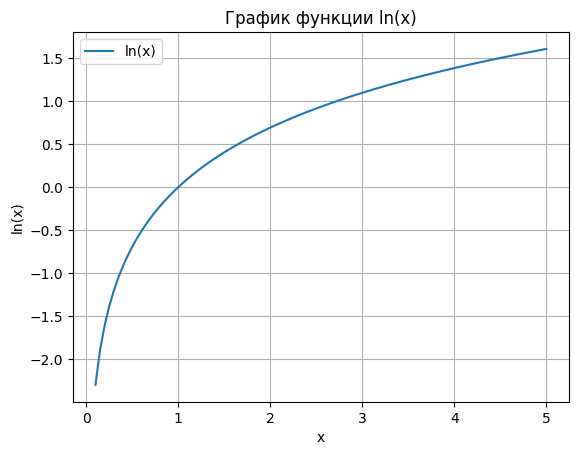

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем значения x от 0.1 до 5 с шагом 0.1
x = np.linspace(0.1, 5, 100)
y = np.log(x)  # Вычисляем значения ln(x)

# Строим график
plt.figure()
plt.plot(x, y, label='ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('График функции ln(x)')
plt.grid(True)
plt.legend()
plt.show()

## Минимизация целевой функции.

Целевая функция (или функционал) в задачах оптимизации - это функция, которую необходимо минимизировать или максимизировать в зависимости от поставленной задачи. В контексте линейной регрессии, целевая функция представляет собой критерий, который определяет, насколько хорошо модель соответствует данным.

В предыдущем разделе мы получили следующую целевую функцию.


$$E(w)=\frac{1}{2} \cdot \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2$$


В линейной регрессии минимизация целевой функции (обычно суммы квадратов разностей между предсказанными значениями и реальными значениями) проводится для нахождения оптимальных коэффициентов модели, которые наилучшим образом соответствуют данным. Путем минимизации целевой функции в линейной регрессии мы стремимся найти наилучшую прямую (или плоскость в случае многомерной регрессии), которая описывает зависимость между независимыми и зависимой переменными.

Минимизация целевой функции в линейной регрессии важна для того, чтобы найти оптимальные значения коэффициентов модели, которые наилучшим образом объясняют зависимую переменную на основе предикторов. Это позволяет построить модель, которая наилучшим образом соответствует данным и может использоваться для прогнозирования или анализа.

Для минимизации целевой функции в линейной регрессии можно использовать различные методы оптимизации, такие как метод наименьших квадратов (МНК), градиентный спуск, нормальное уравнение и другие. Как только целевая функция минимизирована и найдены оптимальные значения коэффициентов модели, модель становится более точной и эффективной в предсказании зависимой переменной на основе предикторов.



## Простая линейная регрессия

Разберёмся, как будет работать такая модель в случае, если $D=1.$ То есть у наших объектов есть ровно один численный признак, по которому они отличаются. Теперь наша линейная модель будет выглядеть совсем просто:
$$\large f(x) = w_1⋅x + w_0,$$

где $w$ — характеризует наклон линии (в будущем мы будем называть значения $w$ весом, weight) а $w_0$ — её сдвиг по $y$ (bias). Таким образом, решение линейной регрессии определяет значения для $w_1$ и $w_0$ так, что $f (x)$ приближается как можно ближе к $y$. $w_1$ и $w_0$ — **параметры модели**.

Отобразим на графике случайные точки, расположенные в окрестности $y = 3⋅x + 2$

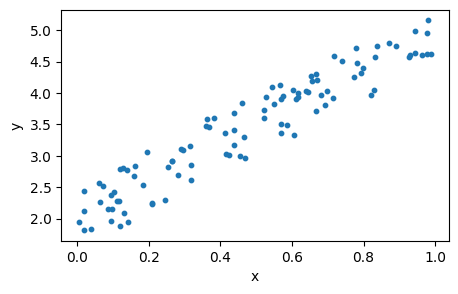

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Предположим, что нам неизвестны параметры наклона и сдвига $w$ и $b$. Для их определения мы бы могли рассмотреть все возможные прямые вида $f(x) = w⋅x + b$ и выбрать среди семейства прямых такую, которая лучше всего приближает имеющиеся данные:

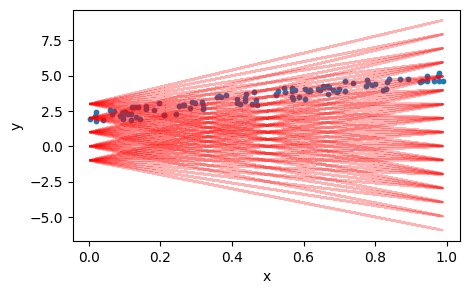

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Модель** $f(x) = w_1⋅x + w_0$ задаёт параметрическое семейство функций, а **выбор "правильного" представителя** из **параметрического семейства** и называется **обучением** модели:

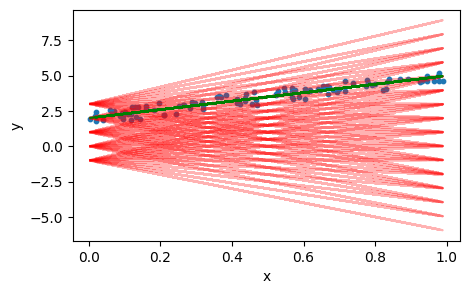

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.plot(x, 2 + 3 * x, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Функция потерь

Как выбрать параметры в данном случае?

Как уже отметили, **функция потерь** позволяет вычислить меру количества ошибок. Для задачи **регрессии** такой мерой может быть **расстояние** между предсказанным значением $f(x)$ и его фактическим значением. Распространенной функцией потерь является **средняя квадратичная ошибка** (MSE), которая совпадает с нашей функцией потерь, которую ранее мы получили.

$$loss=E(w) = \frac{1}{2} \sum_{i=1}^{N} (y_i - f(x_i))^2$$

где $w= \begin{pmatrix} w_0 \\ w_1 \end{pmatrix}=(w_0,w_1)^T$

Для прямой с параметрами $w_1=4$, $w_0 = 2$ и $w_1=3$, $w_0 = 2$ (верные значения):

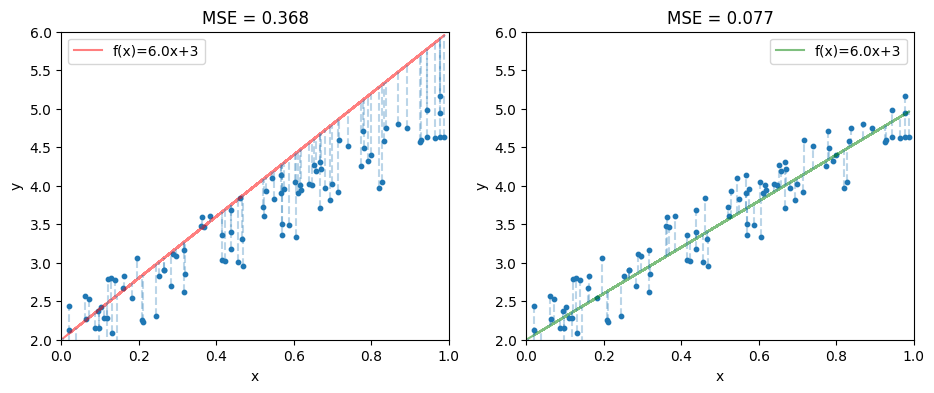

In [ ]:
def plot_delta_line(ax, x, y, w_1, w_0, color="r"):
    y_predicted = w_1 * x + w_0
    # line
    ax.plot(x, y_predicted, color=color, alpha=0.5, label=f"f(x)={w}x+{b}")
    # delta
    for x_i, y_i, f_x in zip(x, y, y_predicted):
        ax.vlines(x=x_i, ymin=min(f_x, y_i), ymax=max(f_x, y_i), ls="--", alpha=0.3)
    # MSE
    E_w = np.sum((y - (w_1 * x + w_0)) ** 2) / (len(x))
    ax.set_title(f"MSE = {E_w:.3f}")
    ax.legend()


fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# plot x_i y_i (dots)
for ax in axs:
    ax.scatter(x, y, s=10)
    ax.set_xlim([0, 1])
    ax.set_ylim([2, 6])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plot_delta_line(axs[0], x, y, w_1=4, w_0=2, color="r")
plot_delta_line(axs[1], x, y, w_1=3, w_0=2, color="g")

plt.show()

Задача **поиска оптимальных параметров** модели сводится к задаче **поиска минимума функции потерь**.

## Поиск локального минимума

Посмотрим, как будет выглядеть ландшафт функции потерь для нашей задачи.

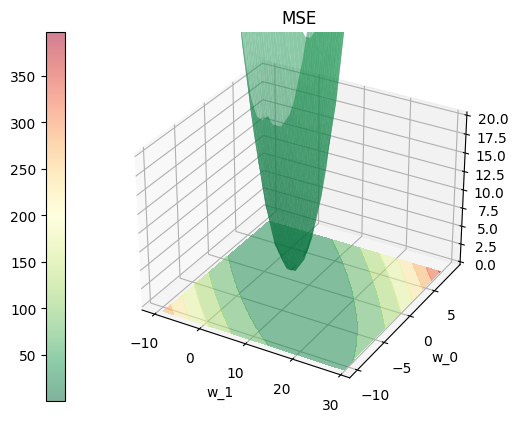

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w_1 = np.arange(-10, 30, 1)
w_0 = np.arange(-10, 10, 1)

w_1, w_0 = np.meshgrid(w_1, w_0)

E_w = np.zeros_like(w_1)
for i in range(w_1.shape[0]):
    for j in range(w_1.shape[1]):
        E_w[i, j] = np.sum((y - (w_1[i, j] * x + w_0[i, j])) ** 2) / (len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(w_1, w_0, E_w, cmap=plt.cm.RdYlGn_r, alpha=0.5)

ax.contourf(w_1, w_0, E_w, zdir="z", offset=-1, cmap="RdYlGn_r", alpha=0.5)
ax.set_zlim(0, 20)

ax.set_xlabel("w_1")
ax.set_ylabel("w_0")
ax.set_title("MSE")

fig.colorbar(surf, location="left")
plt.show()

Необходимым (но недостаточным) условием локального минимума дифференцируемой функции является равенство нулю частных производных:

$$	\begin{equation*}
 \begin{cases}
   \displaystyle\frac{\partial E(w)}{\partial w_1}=0,
   \\
   \displaystyle\frac{\partial E(w)}{\partial w_0}=0.
 \end{cases}
\end{equation*} $$

Т.к. MSE для линейной регрессии — полином второй степени относительно $w_1$ и $w_0$, а полином второй степени не может иметь больше одного экстремума, то локальный минимум будет глобальным.

##  Метод наименьших квадратов

 Для простой линейной регрессии функция потерь обычно определяется как среднеквадратичная ошибка (Mean Squared Error, MSE) и имеет следующий вид:

 $$ E(w) = \frac{1}{2} \sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))^2$$


В данной формуле:
- $ E(w) $ представляет собой функцию потерь, которую мы стараемся минимизировать при настройке параметров модели.
- $ w $ - это вектор параметров модели. В данном случае, $ w_0 $ и $ w_1 $ - это коэффициенты регрессии, которые мы хотим определить.
- $ n $ - количество наблюдений в нашем наборе данных.
- $y_i $ - это фактическое значение зависимой переменной для i-го наблюдения.
- $ x_i $ - это значение независимой переменной для i-го наблюдения.
- Формула $ y_i - (w_0 + w_1x_i) $ представляет собой разницу между фактическим значением и предсказанным значением зависимой переменной для i-го наблюдения.
- Квадрат этой разницы используется для того, чтобы учесть как положительные, так и отрицательные отклонения от фактического значения.
- Сумма квадратов ошибок среднеквадратичная ошибка (MSE) дает общую меру того, насколько хорошо модель соответствует данным.

Наша цель заключается в подборе значений параметров $ w_0 $ и $ w_1 $, чтобы минимизировать эту функцию потерь и обеспечить наилучшее соответствие модели данным.


Минимизация MSE по параметрам $ w_0 $ и $ w_1 $ происходит путем нахождения их значений, при которых градиент функции потерь равен нулю. Это приводит к системе уравнений (условия первого порядка), из которой можно вывести формулы для оптимальных значений параметров $w_0$ и $w_1$. (см. : [МНК, простейшие частные случаи 📚[wiki]](https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Простейшие_частные_случаи).)

1. **Вычисление производных функции потерь по параметрам $w_0$ и $w_1$:**

   Для нахождения оптимальных значений параметров $w_0$ и $w_1$ нужно вычислить частные производные функции потерь $w_0$ и $w_1$ по параметрам $w_0$ и $w_1$:

 $$ \frac{\partial E}{\partial w_0} = -\frac{1}{2} \sum_{i=1}^{n} 2 ⋅(y_i - (w_0 + w_1x_i))=-\sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))$$
   
   $$ \frac{\partial E}{\partial w_1} = -\frac{1}{2} \sum_{i=1}^{n} 2x_i(y_i - (w_0 + w_1x_i))=-\sum_{i=1}^{n} x_i(y_i - (w_0 + w_1x_i))$$

2. **Приравнивание производных к нулю и решение системы уравнений:**

   После вычисления производных, приравняем их к нулю и решим систему уравнений:

   $$ \frac{\partial E}{\partial w_0} = 0 \Rightarrow - \sum_{i=1}^{n} (y_i - (w_0 + w_1x_i))=0 $$

   $$\frac{\partial E}{\partial w_1} = 0 \Rightarrow -\sum_{i=1}^{n} x_i(y_i - (w_0 + w_1x_i)) = 0 $$

3. **Нахождение оптимальных значений $w_0 $ и $w_1$:**

   Решив полученную систему уравнений, найдем оптимальные значения параметров \$w_0 $ и $w_1$, которые минимизируют функцию потерь MSE.




$$w_1 = \frac{n\sum_{i=1}^nx_iy_i - (\sum_{i=1}^nx_i)(\sum_{i=1}^ny_i)}{n\sum_{i=1}^nx_i^2 - (\sum_{i=1}^n x_i)^2};$$

$$w_0 = \frac{\sum_{i=1}^ny_i - w_1(\sum_{i=1}^nx_i)}{n}.$$


Реализуем простейшую модель линейной регрессии с использованием библиотеки NumPy на датасете, определённом выше.



Estimated coefficients:
w_0 = 2.058
w_1 = 2.937
Final equation:
y = 2.937x + 2.058


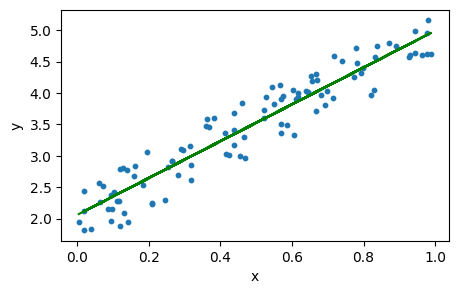

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    n = len(x)
    w_1 = (n * np.sum(np.multiply(x, y)) - np.sum(x) * np.sum(y)) / (n * np.sum(np.multiply(x, x)) - np.sum(x) ** 2)
    w_0 = (np.sum(y) - w_1 * np.sum(x)) / n
    return w_1, w_0

w_1, w_0 = estimate_coef(x, y)

y_predicted = w_1 * x + w_0

print(f"Estimated coefficients:\nw_0 = {w_0:.3f}\nw_1 = {w_1:.3f}")
print(f"Final equation:\ny = {w_1:.3f}x + {w_0:.3f}")

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Полученное решение близко к исходной  зависимости $y=3\cdot x + 2$.


Однако более эффективно с вычислительной точки зрения использовать матрицы для определения модели линейной регрессии и выполнения последующего анализа.

n уравнений простой линейной регрессии можно записать следующим образом:
$$ \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} \cdot \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} + \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix} $$

В матричной формулировке модель линейной регрессии может быть переписана следующим образом:
$$ Y = Xw + \varepsilon $$



В предыдущем разделе, где находили $w_0$ $w_1$, не трудно заметить, что:

$$ \sum y_i = n\beta_0 + \beta_1 \sum x_i     (1) $$
\
$$ \sum x_i y_i = \beta_0 \sum x_i + \beta_1 \sum x_i^2   (2)$$


Известно, что
$$ X^T \cdot X = \begin{bmatrix} 1 & 1 & \cdots & 1 \\ x_1 & x_2 & \cdots & x_n \end{bmatrix} \cdot \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix} = \begin{bmatrix} n & \sum x_i \\ \sum x_i & \sum x_i^2 \end{bmatrix} $$


$$ X^T \cdot Y = \begin{bmatrix} 1 & 1 & \cdots & 1 \\ x_1 & x_2 & \cdots & x_n \end{bmatrix} \cdot \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} \sum y_i \\ \sum x_i y_i \end{bmatrix} $$

Не трудно заметить, что уравнения (1) и (2) эквивалентны следующей матричной формуле:
$$ X^T Y = X^T Xw $$

где $ X^T $ - транспонированная матрица $X$. Таким образом, мы можем получить:
$$ w = (X^T  \cdot X)^{-1}  \cdot X^T  Y $$

где $ w = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} $ - вектор коэффициентов модели (размерность 2x1, первый элемент - свободный член, второй элемент - коэффициент при независимой переменной), $ X$ - матрица независимых переменных (размерность n x 2, первый столбец состоит из 1 для учета свободного члена), $Y$ - вектор зависимой переменной (размерность n x 1) или вектор предсказываемых значений,  $ X^T$ - транспонированная матрица $ X$, $X^T  \cdot X)^{-1}$ - обратная матрица от произведения транспонированной матрицы $ X$ на матрицу $ X$.

Более подробнее см.  [решение 📚[book]](https://sun.tsu.ru/mminfo/2016/Dombrovski/book/chapter-3/chapter-3-2.htm)

Давайте напомним, что ранее мы вводили функции плана, но их так и не использовали.

$$ \Phi(x) = \begin{bmatrix} \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n) \end{bmatrix} $$

и общая формула целевой функции имела следующий вид:

$$ E(w) = \frac{1}{2} \sum_{i=1}^{N} (t_i - w^T \phi(x_i))^2 $$

Теперь с использованием этой матрицы и общей целевой функции мы можем записать формулы для нахождения коэффициентов модели регрессии в общем виде с помощью метода наименьших квадратов.

Для нахождения производной функции $ E(w)$ по вектору параметров $w$, можно применить правило дифференцирования сложной функции и правило дифференцирования квадрата.
   
   $$ \frac{\partial E(w)}{\partial w_k} =-\frac{1}{2} \cdot \sum_{i=1}^{N} 2(t_i - w^T \phi(x_i)) \cdot \phi_j(x_i) =\sum_{i=1}^{N} (w^T \phi(x_i)-t_i ) \cdot \phi_j(x_i)$$

   В векторной форме производная будет выглядеть следующим образом:
   
   $$ \nabla_w E = \sum_{i=1}^{N} ( w^T \phi(x_i)-t_i ) \cdot \phi(x_i)^T $$

Это выражение позволяет найти градиент функции потерь $ E(w)$ по вектору параметров $w$.

Как известно, чтобы найти коэффициенты $ w $, необходимо решить уравнение:

$$ \nabla_w E = 0$$

Если транспонировать обе части данной уравнения, результат останется тем же. Транспонирование обеих сторон уравнения не изменит его смысла:

$$(\nabla_w E)^T = 0^T$$




$$ \nabla_w E^T = \sum_{i=1}^{N} ( w^T \phi(x_i)-t_i ) \cdot \phi(x_i)^T=\sum_{i=1}^{N} ( w^T \phi(x_i)\cdot \phi(x_i)^T-t_i\cdot \phi(x_i)^T )=$$ $$w^T \cdot \sum_{i=1}^{N}  \phi(x_i)\cdot \phi(x_i)^T-\sum_{i=1}^{N} t_i\cdot \phi(x_i)^T $$

Давайте отдельно рассмотрим:

$$\sum_{i=1}^{N}  \phi(x_i)\cdot \phi(x_i)^T$$

Здесь мы умножим вектор-столбец на строку. Если их размер одинаковый, то получается матрица.


В данном случае, если $\phi(x_i)$ - это вектор-столбец размерности $m \times 1$, а $\phi(x_i)^T$ - это вектор-строка размерности $1 \times m$, то их произведение даст матрицу размерности $m \times m$:

$$ \phi(x_i) \cdot \phi(x_i)^T = \begin{bmatrix} \phi_1(x_i) \\ \phi_2(x_i) \\ \vdots \\ \phi_m(x_i) \end{bmatrix} \cdot \begin{bmatrix} \phi_1(x_i) & \phi_2(x_i) & \ldots & \phi_m(x_i) \end{bmatrix} = \begin{bmatrix} \phi_1(x_i)^2 & \phi_1(x_i)\phi_2(x_i) & \ldots & \phi_1(x_i)\phi_m(x_i) \\ \phi_2(x_i)\phi_1(x_i) & \phi_2(x_i)^2 & \ldots & \phi_2(x_i)\phi_m(x_i) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_m(x_i)\phi_1(x_i) & \phi_m(x_i)\phi_2(x_i) & \ldots & \phi_m(x_i)^2 \end{bmatrix} $$

Таким образом, результат произведения вектора-столбца на вектор-строку даст квадратную матрицу.

Не трудно заметить, что


$$ \phi(x_i) \cdot \phi(x_i)^T = \begin{bmatrix} \phi_1(x_i)^2 & \phi_1(x_i)\phi_2(x_i) & \ldots & \phi_1(x_i)\phi_m(x_i) \\ \phi_2(x_i)\phi_1(x_i) & \phi_2(x_i)^2 & \ldots & \phi_2(x_i)\phi_m(x_i) \\ \vdots & \vdots & \ddots & \vdots \\ \phi_m(x_i)\phi_1(x_i) & \phi_m(x_i)\phi_2(x_i) & \ldots & \phi_m(x_i)^2 \end{bmatrix}=Φ \cdot Φ^T $$

Аналогично рассмотрим $$\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T$$
С одной стороны

$$\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T=(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i),
 \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), ...)$$

 а другой стороны

 $$
 (t_1, t_2, ..., t_N) \cdot \begin{bmatrix} \phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \ldots & \phi_p(x_1) \\ \phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \ldots & \phi_p(x_2) \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ \phi_0(x_n) & \phi_1(x_n) & \phi_2(x_n) & \ldots & \phi_p(x_n) \end{bmatrix}=(\sum_{i=1}^{N} t_i \cdot \phi_0(x_i),
 \sum_{i=1}^{N} t_i \cdot \phi_1(x_i), ...)
 $$

 Следовательно:

 $$\sum_{i=1}^{N} t_i \cdot \phi(x_i)^T=t^T \cdot Φ $$

Таким образом:

$$ \nabla_w E^T=w^TΦ^TΦ-t^TΦ^T $$

Отсюда
$$w^TΦ^TΦ-t^TΦ^T=O^T  $$

$$w^TΦ^TΦ=t^TΦ^T$$

Умножим обе части последнего равенства на $(Φ^TΦ)^{-1}$ и получим

$$w^TΦ^TΦ\cdot (Φ^TΦ)^{-1}=t^TΦ^T\cdot (Φ^TΦ)^{-1}$$

После сокращения и некоторых преобразований получим:

$$w^T=t^TΦ^T\cdot (Φ^TΦ)^{-1}$$


> *Чтобы решить уравнение $x^T = A$, где $x$ и $A$ - матрицы, нужно транспонировать обе стороны уравнения. После транспонирования получим:
$$(x^T)^T = A^T$$
Так как транспонирование дважды вернет исходную матрицу, то:
$$ x = A^T$$*





$$w=(t^TΦ^T\cdot (Φ^TΦ)^{-1})^T$$

Из курса алгебры известно, что:
$(A \cdot B)^T=A^T \cdot B^T$ и $(A^T)^{-1}=(A^{-1})^T$

$$w=(Φ^TΦ)^{-1} Φ^Tt^T $$

**Вопрос на подумать**. *Для вычисления $w$
 нам приходится обращать (квадратную) матрицу $Φ^T Φ,$
что возможно, только если она невырожденна. Что это значит с точки зрения анализа данных? Почему мы верим, что это выполняется во всех разумных ситуациях?*

**Ответ.**
Как известно из линейной алгебры, для вещественной матрицы $Φ$
 ранги матриц $Φ$
 и $Φ^T Φ$
 совпадают. Матрица
 невырожденна тогда и только тогда, когда её ранг равен числу её столбцов, что равно числу столбцов матрицы $Φ.$ Иными словами, формула регрессии поломается, только если столбцы матрицы  $Φ$
 линейно зависимы. Столбцы матрицы  $Φ$
 – это признаки. А если наши признаки линейно зависимы, то, наверное, что-то идёт не так и мы должны выкинуть часть из них, чтобы остались только линейно независимые.
Другое дело, что зачастую признаки могут быть приближённо линейно зависимы, особенно если их много. Тогда матрица $Φ^T Φ$
 будет близка к вырожденной, и это, как мы дальше увидим, будет вести к разным, в том числе вычислительным проблемам.

Вычислительная сложность аналитического решения — $O(D^2N + D^3)$
, где N
 — длина выборки,
 D— число признаков у одного объекта. Слагаемое $N^2D$
 отвечает за сложность перемножения матриц  $Φ^T$
 и $Φ$
, а слагаемое $D^3$
 — за сложность обращения их произведения. Перемножать матрицы $(Φ^T Φ)^{-1} $
 и $Φ^T$
 не стоит. Гораздо лучше сначала умножить t
 на $Φ^T$
, а затем полученный вектор на $(Φ^T Φ)^{-1} $
: так будет быстрее и, кроме того, не нужно будет хранить матрицу $(Φ^T Φ)^{-1} \cdot Φ^T. $

Вычисление можно ускорить, используя продвинутые алгоритмы перемножения матриц или итерационные методы поиска обратной матрицы.

## Проблемы «точного» решения
Заметим, что для получения ответа нам нужно обратить матрицу
$Φ^TΦ.$ Это создает множество проблем:

- Основная проблема в обращении матрицы — это то, что вычислительно обращать большие матрицы дело сложное, а мы бы хотели работать с датасетами, в которых у нас могут быть миллионы точек.

- Матрица $Φ^TΦ.$
, хотя почти всегда обратима в разумных задачах машинного обучения, зачастую плохо обусловлена. Особенно если признаков много, между ними может появляться приближённая линейная зависимость, которую мы можем упустить на этапе формулировки задачи. В подобных случаях погрешность нахождения
 будет зависеть от квадрата  [числа обусловленности](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%BE_%D0%BE%D0%B1%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8) матрицы $Φ$
, что очень плохо. Это делает полученное таким образом решение численно неустойчивым: малые возмущения  t
 могут приводить к катастрофическим изменениям w.



### Пара слов про число обусловленности.
Пожертвовав математической строгостью, мы можем считать, что число обусловленности матрицы $Φ$
 – это корень из отношения наибольшего и наименьшего из собственных чисел матрицы $Φ^T Φ$
. Грубо говоря, оно показывает, насколько разного масштаба бывают собственные значения $Φ^T Φ$
. Если рассмотреть $L^2$
-норму ошибки предсказания, как функцию от
, то её линии уровня будут эллипсоидами, форма которых определяется квадратичной формой с матрицей $Φ^T Φ$
 (проверьте это!).
Таким образом, число обусловленности говорит о том, насколько вытянутыми являются эти эллипсоиды.


### Подробнее.

Данные проблемы не являются поводом выбросить решение на помойку. Существует как минимум два способа улучшить его численные свойства, однако если вы не знаете про сингулярное разложение, то лучше вернитесь сюда, когда узнаете.

1) Построим $QR$
-разложение матрицы $X$
. Напомним, что это разложение, в котором матрица $Q$
 ортогональна по столбцам (то есть её столбцы ортогональны и имеют длину 1; в частности, $Q^TQ=E$
), а
 квадратная и верхнетреугольная. Подставив его в формулу, получим

$$w = ((QR)^TQR)^{-1}(QR)^T y = (R^T\underbrace{Q^TQ}_{=E}R)^{-1}R^TQ^Ty = R^{-1}R^{-T}R^TQ^Ty = R^{-1}Q^Ty$$

Отметим, что написать $(R^TR)^{-1} = R^{-1}R^{-T}$
 мы имеем право благодаря тому, что $R$
 квадратная. Полученная формула намного проще, обращение верхнетреугольной матрицы (=решение системы с верхнетреугольной левой частью) производится быстро и хорошо, погрешность вычисления $w$
 будет зависеть просто от числа обусловленности матрицы $Φ$
, а поскольку нахождение $QR$
-разложения является достаточно стабильной операцией, мы получаем решение с более хорошими, чем у исходной формулы, численными свойствами.



2) Также можно использовать псевдообратную матрицу, построенную с помощью сингулярного разложения, о котором подробно написано в разделе про матричные разложения. А именно, пусть

$$A = U\underbrace{\mathrm{diag}(\sigma_1,\ldots,\sigma_r)}_{=\Sigma}V^T$$


– это усечённое сингулярное разложение, где $r$
 – это ранг $A$
. В таком случае диагональная матрица посередине является квадратной, $U$
 и $V$
 ортогональны по столбцам: $U^TU = E$
, $V^TV = E$
. Тогда
$$w = (V\Sigma \underbrace{U^TU}_{=E}\Sigma V^T)^{-1}V\Sigma U^Ty$$

Заметим, что $V\Sigma^{-2}V^T\cdot V\Sigma^2V^T = E = V\Sigma^2V^T\cdot V\Sigma^{-2}V^T$
, так что $(V\Sigma^2 V^T)^{-1} = V\Sigma^{-2}V^T$
, откуда

$w = V\Sigma^{-2}\underbrace{V^TV}_{=E}\Sigma U^Ty = V\Sigma^{-1}Uy$


Хорошие численные свойства сингулярного разложения позволяют утверждать, что и это решение ведёт себя довольно неплохо.

Тем не менее, вычисление всё равно остаётся довольно долгим и будет по-прежнему страдать (хоть и не так сильно) в случае плохой обусловленности матрицы $X$
.



Полностью вылечить проблемы мы не сможем, но никто и не обязывает нас останавливаться на «точном» решении (которое всё равно никогда не будет вполне точным). Поэтому ниже мы познакомим вас с совершенно другим методом.

## Метрики регрессии

С одной из метрик регрессии мы уже познакомились: это $MSE$, которую мы минимизировали в методе наименьших квадратов. Стоит отметить что $MSE$ имеет [размерность 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) квадрата размерности предсказываемого значения.

$$ MSE  = \frac{1}{N} \sum (y_i - f(x_i))^2$$

Чтобы получить оценку ошибки той же размерности, можно взять корень (root) от $MSE$. Это метрика $RMSE$:

$$ RMSE = \sqrt{\frac{1}{N} \sum (y_i - f(x_i))^2}$$

Или посчитать среднюю абсолютную ошибку $MAE$:

$$ MAE = \frac{1}{N} \sum |y_i - f(x_i)|$$

Существуют и более специфичные метрики, например $R^2$, которая принимает значения от $(-\inf, 1]$, где $1$  —  наилучший вариант. $R^2$  называется [коэффициентом детерминации 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) и характеризуют долю дисперсии целевого значения, которую объясняет модель.

$$R^2 = 1 - \frac{MSE}{\sigma^2}=1 - \frac{\sum {(y_i-f(x_i))^2}}{\sum{(y_i-\bar{y})^2}},$$

$$\bar{y} = \frac{1}{N}\sum {y_i},$$

где $\sigma^2$ — дисперсия.



<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/linear_regression.png" width="600"></center>

<center><em>Когда $R^2$ около нуля, модель плохо объясняет данные</em></center>

<center><em>Source: <a href="https://xkcd.com/1725">https://xkcd.com/1725</a></em></center>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{mean_squared_error(y_true, y_predicted, squared=False):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"R2 score: {r2_score(y_true, y_predicted):.3f}")


print_metrics(y, y_predicted)

Mean squared error: 0.076
Root mean squared error:  0.276
Mean absolute error: 0.237
R2 score: 0.904


Подробнее про метрики можно почитать [тут 📚[book]](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii). Там же вы можете найти информацию об относительных ошибках, выражаемых в процентах.

## Модель линейной регрессии из библиотеки scikit-learn

Свою линейную регрессию мы написали, теперь изучим, как работать с моделью из Sklearn.

Рассмотрим следующую задачу. Пусть мы хотим построить модель предсказания успеваемости студента на основе информации о величине потраченного им на изучение материала количества времени в часах. Это пример простейшей задачи линейной регрессии.

Загрузим датасет [Students Score 🛠️[doc]](https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression). Датасет содержит два числовых значения — часы и результаты.

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)
print(dataset.shape)
dataset.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Построим график зависимости одного от другого, а также отобразим распределения каждой из переменных

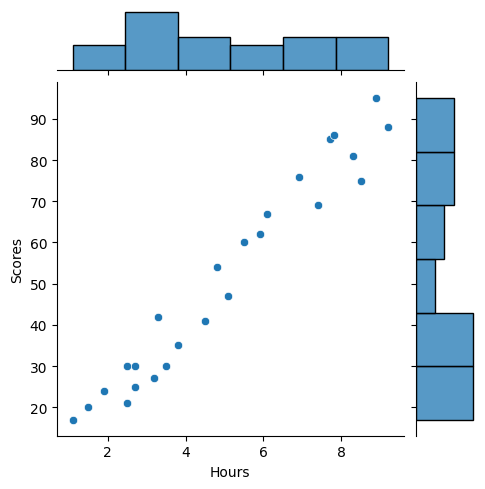

In [ ]:
import seaborn as sns

sns.jointplot(data=dataset, x="Hours", y="Scores", height=5)
plt.show()

Разделим наши данные на train и test

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

В случае сложного, многомодового распределения значений целевой переменной в задаче регрессии, может быть полезно задуматься о стратификации данных. Стратификация данных для задачи регрессии специфична и не реализована в Sklearn, о ней можно почитать в [Regression Analysis Based on Stratified Samples 🎓[article]](https://www.jstor.org/stable/2336525?seq=1), пример кода можно найти на [форуме ✏️[blog]](https://datascience.stackexchange.com/questions/33140/stratify-on-regression).

Теперь создадим модель для линейной регрессии. Чтобы не писать с нуля, воспользуемся готовой моделью из библиотеки Sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

И обучим ее

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

Посмотрим, что получилось

In [ ]:
x_train.shape

(20, 1)

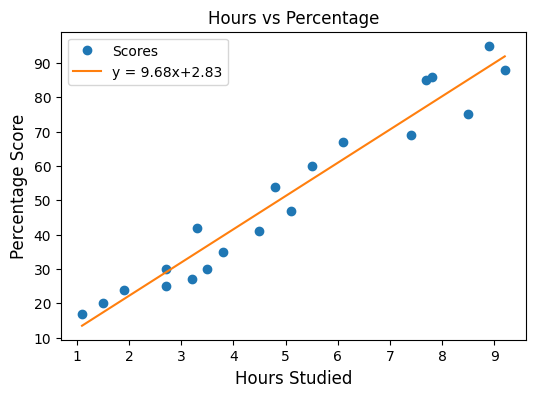

In [ ]:
x_points = np.linspace(min(x_train), max(x_train), 100)  # 100 dots at min to max
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Теперь сделаем предсказание для тестовой выборки

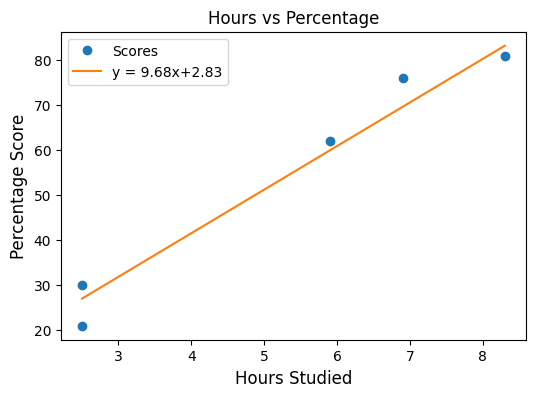

In [ ]:
y_pred = regressor.predict(x_test)

x_points = np.linspace(min(x_test), max(x_test), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_test, y_test, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Выглядит неплохо.

Посчитаем метрики для наших значений:

In [ ]:
y_pred = regressor.predict(x_test)
print_metrics(y_test, y_pred)

Mean squared error: 18.943
Root mean squared error:  4.352
Mean absolute error: 3.921
R2 score: 0.968


Будьте осторожнее: модели отражают только те закономерности, которые видели в данных. Вероятность того, что студент, потративший на подготовку 20 часов, получит больше максимального балла, мала.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/extrapolating.png" width="600"></center>

<center><em>Source: <a href="https://xkcd.com/605">https://xkcd.com/605</a></em></center>





# Метод градиентного спуска

Мы решали задачу линейной регрессии аналитически (МНК), но это не всегда возможно по нескольким причинам:
* Для аналитического решения нужно считать обратную матрицу, это вычислительно сложно и матрица бывает плохо определенной.
* Данных может быть слишком много для того, чтобы их можно было одновременно положить в память для расчета обратной матрицы.
* Модели могут быть слишком сложными для поиска аналитического решения. Более того, для сложных моделей ландшафт функции потерь может иметь сложный рельеф с несколькими локальными минимумами.

Давайте поговорим о том, что делать в таком случае.

## Градиент

Метод, который мы будем использовать, называется **“метод градиентного спуска”**. Для начала вспомним, что такое **градиент**. Возьмем функцию двух переменных:

$$\large f(x, y) = \sin(x\cdot y)$$

Она будет отличаться от функции потерь, которую мы визуализировали, тем, что у нее будет не один экстремум, а сложный рельеф. Рассчитаем ее на диапазоне значений от $0$ до $4$.

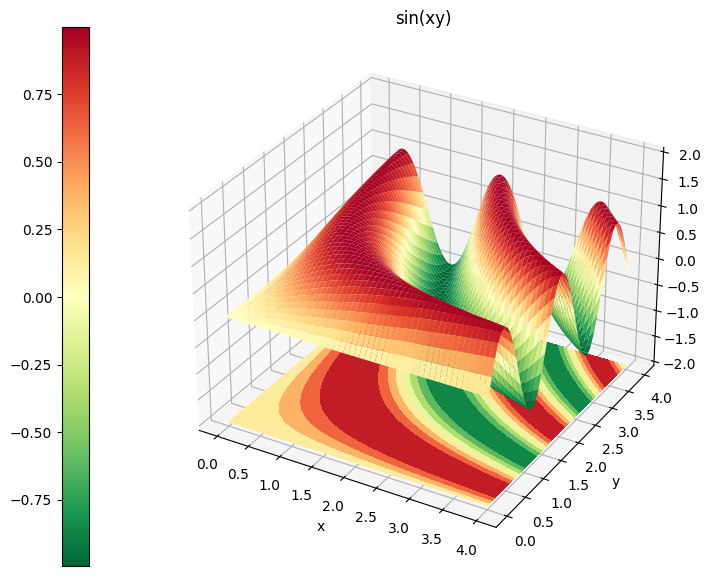

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

fig = plt.figure(figsize=(20, 7))


def show_3d(xx, yy, zz, fig):
    ax = fig.add_subplot(121, projection="3d")
    surf = ax.plot_surface(xx, yy, zz, cmap=plt.cm.RdYlGn_r)

    ax.contourf(xx, yy, zz, zdir="zz", offset=-2, cmap="RdYlGn_r")
    ax.set_zlim(-2, 2)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("sin(xy)")
    fig.colorbar(surf, location="left")


show_3d(xx, yy, zz, fig)
plt.show()

Eсли $\varphi = \varphi(\vec{x})=\varphi(x_1 \dots x_n)$ — функция $n$ переменных, то её градиентом называется $n$-мерный вектор:
$$
\nabla \varphi(\vec{x})=
\begin{bmatrix}
\displaystyle\frac{\partial\varphi}{\partial x_1}\\
\displaystyle\frac{\partial\varphi}{\partial x_2}\\
...\\
\displaystyle\frac{\partial\varphi}{\partial x_n}\\
\end{bmatrix}
$$


Посчитаем градиент нашей функции $f(x, y)$. Для этого воспользуемся [**таблицей производных** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D1%8B%D1%85) и правилом вычисления [**производной сложной функции** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D0%BE%D0%B9_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8) (Chain-rule):
$$\frac {\partial f} {\partial x} = \frac {\partial f} {\partial t} \cdot \frac {\partial t} {\partial x}$$

Это правило очень нам пригодится в будущем.

$$\nabla f(x, y)=\begin{bmatrix}
\displaystyle\frac{\partial f}{\partial x}\\
\displaystyle\frac{\partial f}{\partial y}\\
\end{bmatrix}
=\begin{bmatrix}
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial x}\\
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial y}\\
\end{bmatrix}
= \begin{bmatrix}
\cos(xy)\cdot y\\
\cos(xy)\cdot x\\
\end{bmatrix}
$$

Посчитаем градиент на том же диапазоне (сетка реже, т.к. мы будем рисовать не точки, а стрелочки):

In [ ]:
gradf = lambda x, y: (np.cos(x * y) * y, np.cos(x * y) * x)

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

Так как **значение градиента в точке** — это вектор, мы можем говорить о его **величине** и **направлении**. Так как значение градиента в точке — это вектор, мы можем говорить о его величине и направлении. Визуализируем наши расчеты: посмотрим на ландшафт функции $f(x, y)$ и направления градиентов.


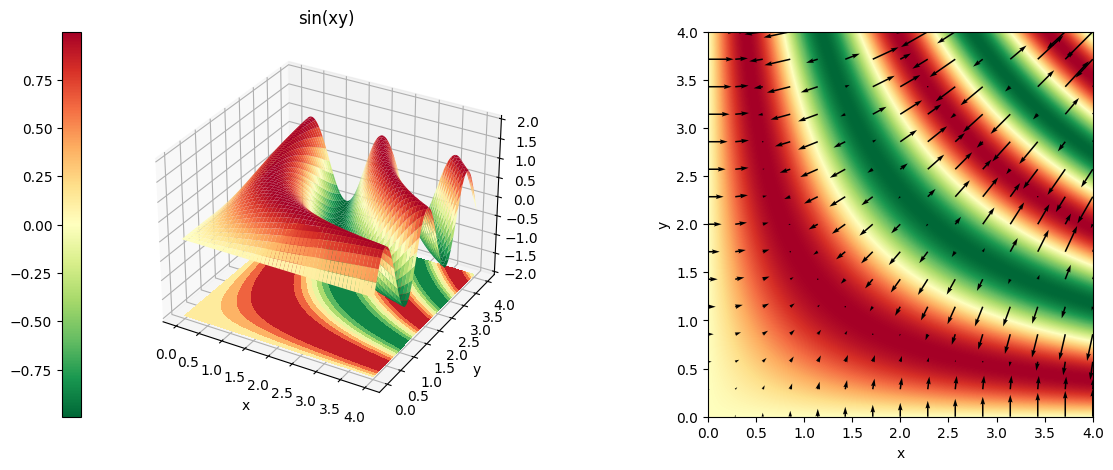

In [ ]:
fig = plt.figure(figsize=(15, 5))
show_3d(xx, yy, zz, fig)

ax = fig.add_subplot(122)
ax.imshow(
    zz,
    extent=(np.min(x), np.max(x), np.min(y), np.max(y)),
    cmap="RdYlGn_r",
    origin="lower",
)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.quiver(xxsmall, yysmall, gradx, grady)
plt.show()

На рисунке выше значения градиента в точке обозначены чёрными стрелочками. Можно заметить, что длина стрелок в  районе максимальных и минимальных значений функции **почти нулевая**, стрелки направлены в направлении возрастания значения функции, и наиболее длинные стрелки находятся в области наиболее резкого изменения значений функции.


Это проявление **свойств градиента**:
* Направление $\frac{\nabla f}{||\nabla f||}$ — сообщает нам направление максимального роста функции.

*  Величина $||\nabla f||$ — характеризует мгновенную скорость изменения значений функции.

## Идея градиентного спуска

Загрузим еще раз данные с зависимостью оценок студентов от времени подготовки.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Скачаем **код для интерактивной визуализации**. Он нужен только для объяснения и **не пригодится вам в работе**. Его разбирать мы не будем. Eсли интересно, можно изучить самостоятельно.

In [ ]:
# @title *Code for interactive visual
# source: https://github.com/TomasBeuzen/deep-learning-with-pytorch

!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/interactive_visualization.py

Для простоты рассмотрим одномерный случай. Будем подбирать только $w$, значение $b$ зафиксируем на уровне $2.83$. Визуализируем ошибку и значения $\displaystyle \frac{\partial Loss}{\partial w}$ для MSE Loss.

In [ ]:
from interactive_visualization import plot_grid_search
from sklearn.metrics import mean_squared_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mse = np.array([mean_squared_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmse_dw = np.array(
    [(2 * x_train[:, 0] * (w * x_train[:, 0] + 2.83 - y_train)).mean() for w in slopes]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mse, dmse_dw)

 Видно, что оптимальное значение наклона соответствует минимуму MSE и нулю частной производной $\displaystyle\frac{\partial Loss}{\partial w}$. Аналогично будет, если мы возьмем в качестве Loss MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mae = np.array([mean_absolute_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmae_dw = np.array(
    [
        (x_train[:, 0] * np.sign(w * x_train[:, 0] + 2.83 - y_train)).mean()
        for w in slopes
    ]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mae, dmae_dw)

Итого, т.к. градиент указывает направление наибольшего возрастания функции:

* если $\displaystyle\frac{\partial Loss}{\partial w} < 0$, то нам имеет смысл “идти” в сторону возрастания $\displaystyle\frac{\partial Loss}{\partial w}$;

* если $\displaystyle\frac{\partial Loss}{\partial w} > 0$ — в сторону убывания.

**Метод градиентного спуска** — итеративный метод, идея которого заключается в том, чтобы небольшими шажками “идти” в **обратную от градиента сторону**:

$$\large \vec w_{n+1} = \vec w_{n} - α \cdot \nabla_{\vec w_{n}} Loss,$$
где $α$ — скорость обучения.


Теперь давайте покажем, почему вектор градиента показывает направление наибольшего роста функции.

**Что такое градиент функции?**

Градиент функции многих переменных - это вектор, состоящий из частных производных этой функции по каждой из переменных. Градиент функции многих переменных указывает направление наибольшего возрастания функции в данной точке и его значение показывает скорость изменения функции в этом направлении. Градиент помогает определить направление наискорейшего возрастания функции и применяется, например, в задачах оптимизации для поиска экстремумов функций.

Для функции $ f(x_1, x_2, ..., x_n) $ градиентом называется вектор, обозначаемый символом $ \nabla$, который состоит из частных производных функции по каждой из переменных:

$$\nabla f = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n} \right)$$

Это выражение представляет собой градиент функции многих переменных.

**Что такое производная по направлению?**

Производная по направлению - это производная функции в определенном направлении или вдоль заданного вектора. Рассмотрим производную функции $ f(x_1, x_2, ..., x_n) $ по направлению вектора $ \vec{u} = (u_1, u_2, ..., u_n) $. Предполагается, что вектор $ \vec{u} $ нормирован, то есть имеет единичную длину, т.е. $ ||\vec{u}||=1,$

где

$$ ||\vec{u}|| = \sqrt{u_1^2 + u_2^2 + \cdots + u_n^2} $$



Используя определение производной по направлению, можно записать формулу для производной по направлению вектора градиента функции многих переменных.




Используя определение производной по направлению, можно записать формулу для производной функции $ f$:

$$ \lim_{{h \to 0}} \frac {f(\vec{x}+h \cdot \vec{u})-f(\vec{x})}{h} $$

где $ \vec{x}+h \cdot \vec{u} = (x_1+h \cdot u_1, x_2+h \cdot u_2, ...) $.

С учетом этого, формула для производной функции $ f(x) $ переписывается следующим образом:



$$ \lim_{{h \to 0}} \frac {f(x_1+h \cdot u_1, x_2+h \cdot u_2, ...)-f(x_1, x_2, ...)}{h}. $$



Мы с вами применим известный прием, т.е.


$$ \lim_{{h \to 0}} \frac {f(x_1+h \cdot u_1, x_2+h \cdot u_2, ...)-f(x_1, x_2, ...)}{h}=
 \lim_{{h \to 0}} \frac {f(x_1+h \cdot u_1, x_2+h \cdot u_2, ...)-f(x_1, x_2+h \cdot u_2, ...)+f(x_1, x_2+h \cdot u_2, ...)-f(x_1, x_2, ...)+f(x_1, x_2, ...)-...f(x_1, x_2, ..., x_{n-1}, x_n+h \cdot u_n)+f(x_1, x_2, ..., x_{n-1}, x_n+h \cdot u_n)-f(x_1, x_2, ...)}{h}=\lim_{{h \to 0}}\sum\limits_{i=1}^{n}\frac {f(x_1,x_2, ..., x_i+h \cdot u_i, ..., x_n+h \cdot u_n)-f(x_1, x_2,  x_i, x_{i+1}+h \cdot u_{i+1})}{h}
 $$


Видно, что полученная формула
$$
\lim_{{h \to 0}}\sum\limits_{i=1}^{n}\frac {f(x_1,x_2, ..., x_i+h \cdot u_i, ..., x_n+h \cdot u_n)-f(x_1, x_2,  x_i, x_{i+1}+h \cdot u_{i+1})}{h}
$$
является почти формулой частной производной функции. Если умножим данную формулу на $u$ и поделим на $u$, то получится формула частной производной функции, т.е.

$$
\lim_{{h \to 0}}\sum\limits_{i=1}^{n}\frac {f(x_1,x_2, ..., x_i+h \cdot u_i, ..., x_n+h \cdot u_n)-f(x_1, x_2,  x_i, x_{i+1}+h \cdot u_{i+1})}{h}
=
\lim_{{h \to 0}}\sum\limits_{i=1}^{n}\frac {f(x_1,x_2, ..., x_i+h \cdot u_i, ..., x_n+h \cdot u_n)-f(x_1, x_2,  x_i, x_{i+1}+h \cdot u_{i+1})}{h\cdot u_i}\cdot u_i=\nabla f^T u
$$

Известно, что $$\vec{a}^T \cdot \vec{b}=||a||\cdot ||b|| \cos(\hat{a, b}).$$
Тогда
$$\nabla f^T u=||\nabla f|| \cdot \cos (\hat{\nabla f, u})$$

Как известно, производная по направлению - это скорость роста функции при движении в данном направлении, то есть в направлении, которое указывает вектор $ \vec{u} $. Теперь возникает вопрос: в какую сторону должен быть направлен вектор $ \vec{u} $, чтобы скорость роста была максимальной?

Ответ: в ту сторону, где косинус угла между векторами $ \nabla f $ и $ \vec{u} $ будет максимальным. Поскольку норма вектора градиента не влияет на это значение, максимальное значение косинуса достигается при угле равном нулю, когда направление вектора градиента совпадает с направлением вектора $ \vec{u} $. Именно поэтому, если мы возьмем производную по направлению вектора градиента, мы получим наибольший рост и движение в направлении наибольшего возрастания функции, в отличие от движения в обратном направлении - движение в направлении наибольшего убывания

У градиента есть ещё одно свойство, которое пригодится нам при попытках
визуализировать процесс оптимизации,~ он ортогонален линиям уровня.
Докажем это.
Пусть~ $x_0$ ~--- некоторая точка,

$ S(x_0) = \{x \in R^d | f(x) = f(x_0)|\}$ ~ соответствующая линия уровня.
Разложим функцию в ряд Тейлора на этой линии в окрестности~$x_0$:

$$
    f(x_0 + \varepsilon) = f(x_0) + \langle \nabla f, \varepsilon \rangle + o(||\varepsilon||),
$$

где~ $x_0 + \varepsilon \in S(x_0)$.
Поскольку~$f(x_0 + \varepsilon) = f(x_0)$~(как-никак, это линия уровня), получим
$$
    \langle \nabla f, \varepsilon \rangle = o(||\varepsilon||).
$$
Поделим обе части на~$||\varepsilon||$:
$$
    \left\langle \nabla f, \frac{\varepsilon}{|\varepsilon|} \right\rangle = o(1).
$$

Устремим $|\varepsilon|$ к нулю.
При этом вектор~ $\frac{\varepsilon}{|\varepsilon|}$ будет стремится к касательной к линии уровня в точке~$x_0$.
В пределе получим, что градиент ортогонален этой касательной.




Для лучшего понимания рассмотрим метод градиентного спуска в случае простой линейной регрессии.
$$
y=w_0+w_1 x
$$
Для того чтобы двигаться в направлении минимизации функции стоимости, мы должны изменять вектор весов $ w$. Если мы изменяем небольшое количество $ \Delta w_0 $ в направлении $ w_0 $ и небольшое количество $ \Delta w_1 $ в направлении $ w_1 $, то изменение функции стоимости $ E(w)$ будет приближенно равно:

$$ \Delta E \approx \frac{\partial E}{\partial w_0} \cdot \Delta w_0 + \frac{\partial E}{\partial w_1} \cdot \Delta w_1 $$

где

$$ \frac{\partial E}{\partial w_0} = \frac{1}{n} \sum_{i=1}^{n} ((w_0 + w_1 x_i) - y_i) $$

$$\frac{\partial E}{\partial w_1} = \frac{1}{n} \sum_{i=1}^{n} ((w_0 + w_1 x_i) - y_i) \cdot x_i $$

Мы хотим узнать, как изменится функция стоимости, если мы изменим вектор весов на значение $ \Delta w = (\Delta w_0, \Delta w_1)^T $. Для этого мы можем использовать формулу приращения:


Мы хотим узнать, как изменится функция стоимости, если мы изменим вектор весов на значение $\Delta w = (\Delta w_0, \Delta w_1)^T $. Для этого мы можем использовать формулу приращения функции стоимости $ E(w) $ в окрестности текущего вектора весов $w$:

$$ E(w + \Delta w) \approx E(w) + \nabla E^T \cdot \Delta w $$

где $ \nabla E$ - градиент функции стоимости $E(w)$ по вектору весов $ w $.



В итоге получим обновление весов по формулам:
$$ w_0 := w_0 - \alpha \cdot \frac{1}{n} \sum_{i=1}^{n} ((w_0 + w_1 x_i) - y_i) $$

$$ w_1 := w_1 - \alpha \cdot \frac{1}{n} \sum_{i=1}^{n} ((w_0 + w_1 x_i) - y_i) \cdot x_i $$

Где скорость обучения $\alpha$ контролирует, насколько быстро мы хотим двигать веса к минимуму. Веса обновляются до тех пор, пока не будет достигнуто минимальное суммарное квадратичное отклонение или пока дальнейшее улучшение не будет возможно.



**Конкретный пример:**

Давайте рассмотрим функцию двух переменных:

$$f(x, y) = x^2 + y^2 $$

Это параболоид, который достигает своего минимального значения в точке $(0, 0)$.

**1. Вычисление градиента функции**

Градиент функции $f(x, y)$ — это вектор частных производных по каждой переменной:

\[
\begin{align*}
\frac{\partial f}{\partial x} &= 2x \\
\frac{\partial f}{\partial y} &= 2y \\
\end{align*}
$$

Таким образом, градиент:

\[
\nabla f(x, y) = (2x, 2y)
$$

**2. Демонстрация направления наибольшего возрастания**

Возьмём точку $(x_0, y_0) = (1, 1)$. Градиент в этой точке:

\[
\nabla f(1, 1) = (2 \cdot 1, 2 \cdot 1) = (2, 2)
$$

Вектор $(2, 2)$ указывает направление наибольшего возрастания функции $f$ в точке $(1, 1)$.

**3. Производная по направлению**

Рассмотрим произвольный единичный вектор направления $\vec{u} = (u_x, u_y)$. Производная по направлению $D_{\vec{u}} f$ в точке $(1, 1)$:

\[
D_{\vec{u}} f = \nabla f(1, 1) \cdot \vec{u} = (2, 2) \cdot (u_x, u_y) = 2u_x + 2u_y
$$

Максимальное значение производной по направлению достигается, когда $\vec{u}$ сонаправлен с градиентом $\nabla f(1, 1)$.

Например, если $\vec{u} = \left( \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)$ (направление градиента):

\[
D_{\vec{u}} f = 2 \cdot \frac{1}{\sqrt{2}} + 2 \cdot \frac{1}{\sqrt{2}} = 2\sqrt{2}
$$

Если же $\vec{u} = \left( \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}} \right)$ (перпендикулярно градиенту):

\[
D_{\vec{u}} f = 2 \cdot \frac{1}{\sqrt{2}} + 2 \cdot \left( -\frac{1}{\sqrt{2}} \right) = 0
$$

Нулевая производная по направлению означает, что функция не изменяется вдоль этого направления (линия уровня).

**4. Ортогональность градиента линиям уровня**

Линии уровня функции $f(x, y) = c$ — это окружности с центром в начале координат и радиусом $r = \sqrt{c}$:

\[
x^2 + y^2 = c
$$

В точке $(1, 1)$ касательная к окружности имеет направление, перпендикулярное градиенту $(2, 2)$. Это подтверждает, что градиент ортогонален линиям уровня и указывает направление наибольшего возрастания функции.

**5. Применение градиента в методе градиентного спуска**

Допустим, мы хотим найти минимум функции $f(x, y)$ методом градиентного спуска. Начинаем с точки $(x_0, y_0) = (1, 1)$ и выбираем скорость обучения $\alpha = 0.1$.

**Шаг 1:**

Градиент в точке $(1, 1)$:

\[
\nabla f(1, 1) = (2 \cdot 1, 2 \cdot 1) = (2, 2)
$$

Обновляем значения $x$ и $y$:

\[
\begin{align*}
x_1 &= x_0 - \alpha \frac{\partial f}{\partial x} = 1 - 0.1 \cdot 2 = 0.8 \\
y_1 &= y_0 - \alpha \frac{\partial f}{\partial y} = 1 - 0.1 \cdot 2 = 0.8 \\
\end{align*}
$$

**Шаг 2:**

Градиент в точке $(0.8, 0.8)$:

\[
\nabla f(0.8, 0.8) = (2 \cdot 0.8, 2 \cdot 0.8) = (1.6, 1.6)
$$

Обновляем значения:

\[
\begin{align*}
x_2 &= 0.8 - 0.1 \cdot 1.6 = 0.64 \\
y_2 &= 0.8 - 0.1 \cdot 1.6 = 0.64 \\
\end{align*}
$$

Продолжая этот процесс, мы постепенно приближаемся к минимуму в точке $(0, 0)$.

**6. Пример с линейной регрессией**

Рассмотрим задачу линейной регрессии с данными:

| $x$ | $y$ |
|---------|---------|
|   1     |   2     |
|   2     |   3     |
|   3     |   5     |

Цель — найти параметры $w_0$ и $w_1$, минимизируя функцию стоимости (среднеквадратичную ошибку):

\[
E(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} (w_0 + w_1 x_i - y_i)^2
$$

**Вычисление градиента функции стоимости**

Частные производные:

\[
\begin{align*}
\frac{\partial E}{\partial w_0} &= \frac{2}{n} \sum_{i=1}^{n} (w_0 + w_1 x_i - y_i) \\
\frac{\partial E}{\partial w_1} &= \frac{2}{n} \sum_{i=1}^{n} (w_0 + w_1 x_i - y_i) x_i \\
\end{align*}
$$

**Начальные значения параметров:**

Пусть $w_0 = 0$ и $w_1 = 0$.

**Вычисление градиента при начальных значениях:**

Количество точек $n = 3$.

\[
\begin{align*}
\frac{\partial E}{\partial w_0} &= \frac{2}{3} \left[ (0 + 0 \cdot 1 - 2) + (0 + 0 \cdot 2 - 3) + (0 + 0 \cdot 3 - 5) \right] \\
&= \frac{2}{3} (-2 - 3 - 5) = \frac{2}{3} (-10) = -\frac{20}{3} \\
\\
\frac{\partial E}{\partial w_1} &= \frac{2}{3} \left[ (0 + 0 \cdot 1 - 2) \cdot 1 + (0 + 0 \cdot 2 - 3) \cdot 2 + (0 + 0 \cdot 3 - 5) \cdot 3 \right] \\
&= \frac{2}{3} (-2 \cdot 1 - 3 \cdot 2 - 5 \cdot 3) = \frac{2}{3} (-2 - 6 - 15) = \frac{2}{3} (-23) = -\frac{46}{3} \\
\end{align*}
$$

**Обновление параметров:**

Выбираем скорость обучения $\alpha = 0.1$.

\[
\begin{align*}
w_0^{(1)} &= w_0^{(0)} - \alpha \frac{\partial E}{\partial w_0} = 0 - 0.1 \left( -\frac{20}{3} \right) = \frac{2}{3} \approx 0.6667 \\
w_1^{(1)} &= w_1^{(0)} - \alpha \frac{\partial E}{\partial w_1} = 0 - 0.1 \left( -\frac{46}{3} \right) = \frac{46}{30} \approx 1.5333 \\
\end{align*}
$$

**Вычисление функции стоимости после обновления параметров:**

\[
E(w_0^{(1)}, w_1^{(1)}) = \frac{1}{3} \left[ (0.6667 + 1.5333 \cdot 1 - 2)^2 + (0.6667 + 1.5333 \cdot 2 - 3)^2 + (0.6667 + 1.5333 \cdot 3 - 5)^2 \right]
$$

Подставляя значения и вычисляя, получаем новое значение функции стоимости, которое должно быть меньше предыдущего. Повторяя процесс, мы постепенно минимизируем ошибку и находим оптимальные параметры $w_0$ и $w_1$.

**7. Вывод**

Этот пример показывает, как градиент функции используется для нахождения направления наибольшего возрастания (или убывания при градиентном спуске) и как это применяется на практике, например, в методе градиентного спуска для обучения моделей линейной регрессии. Градиент указывает нам, как следует изменить параметры модели, чтобы минимизировать функцию стоимости и улучшить качество модели.



Для более подробного ознакомления читайте статью: [Производная по направлению и градиент функции](http://mathprofi.ru/proizvodnaja_po_napravleniju_i_gradient.html)

Попробуем реализовать это в коде (для простоты только для $w$ при $b=2.83$).

In [ ]:
def gradient(x, y, w, b):
    return 2 * (x * (w * x + b - y)).mean()


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, b=2.83, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = [w]
    mse_train = [mean_squared_error(y_train, w * x_train + b)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, w * x_test + b)]
    prediction = {w: w * x_train + b}
    print(
        f"Iteration 0: w = {w:.2f}, Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )
    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w, b)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws.append(w)
        mse_train.append(mean_squared_error(y_train, w * x_train + b))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, w * x_test + b))
        prediction[w] = w * x_train + b
        print(
            f"Iteration {i+1}: w = {w:.2f}, Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Обучим нашу модель:

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.01, iteration=7
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 7.89, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 9.00, Loss_train = 130.56, Loss_test = 145.80.
Iteration 3: w = 9.42, Loss_train = 45.98, Loss_test = 42.65.
Iteration 4: w = 9.58, Loss_train = 33.58, Loss_test = 24.38.
Iteration 5: w = 9.64, Loss_train = 31.77, Loss_test = 20.49.
Iteration 6: w = 9.67, Loss_train = 31.50, Loss_test = 19.46.
Iteration 7: w = 9.68, Loss_train = 31.46, Loss_test = 19.13.


Визуализируем процесс обучения:

In [ ]:
from interactive_visualization import plot_gradient_descent

plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Видно, что за $7$ эпох мы получили то же значение $w$, что получали при использовании `LinearRegression`. При этом мы пришли в минимум $\text{MSE}$ и ноль градиента.


В реальности мы будем работать с функциями многих переменных, поэтому смотреть на сходимость по одной переменной — не самый оптимальный вариант. Более эффективно будет посмотреть на зависимость Loss от количества эпох для train и test.

In [ ]:
def plot_mse(mse_train, mse_test):
    plt.figure(figsize=(10, 4))
    plt.title("Learning curve")
    plt.plot(mse_train, label="train")
    plt.plot(mse_test, label="test")
    plt.legend()

    plt.xlabel("iterations", fontsize=12)
    plt.ylabel("MSE Loss", fontsize=12)

    plt.grid(True)
    plt.show()

Такие графики называют кривыми обучения. Посмотрим на кривые обучения при нашей скорости обучения $α=0.01$.

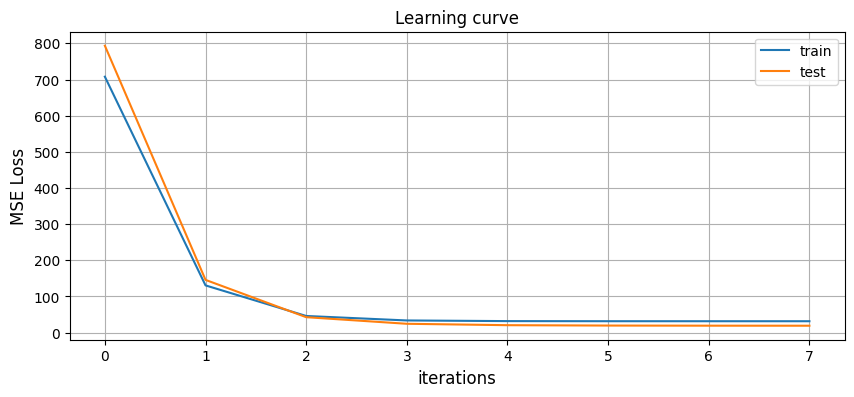

In [ ]:
plot_mse(mse_train, mse_test)

Видно, что **Loss падает** как на **train**, так и на **test** выборке. Также мы можем сказать, что **сеть обучалась**: train и test **графики вышли на плато**. При этом не произошло **переобучение**: ошибка на **test** выборке **не начала расти** (про переобучение поговорим позже).

В полученных графиках есть особенность, которая бросается в глаза опытному в обучении моделей человеку: **Loss на test выборке меньше, чем на train**. Это показатель того, что **с данными что-то не так**. Так бывает при утечке данных (об утечке данных вы подробнее узнаете в следующих лекциях), но в данном случае, test выборка просто слишком мала, чтобы отражать генеральную совокупность (всего 5 студентов, доверительный интервал для такого маленького количества объектов будет широкий).

## Выбор скорости обучения

**Скорость (шаг) обучения** — некоторый коэффициент, как правило, небольшой, который не позволяет нам двигаться слишком быстро. У нас есть точка, в которую мы хотим попасть. Если мы сделаем слишком большой шаг, то мы ее перескочим (график справа), поэтому надо подобрать шаг, который не позволит ее перескочить, но в то же время такой, чтобы тот же процесс не шел слишком медленно (как на графике слева).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/learning_rate_optimal_value.png">

Посмотрим на скорость обучения на нашем примере. При **маленькой скорости обучения** мы будем очень медленно сходиться к минимуму.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.0005, iteration=30
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 5.14, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 5.28, Loss_train = 666.74, Loss_test = 748.16.
Iteration 3: w = 5.42, Loss_train = 628.13, Loss_test = 705.49.
Iteration 4: w = 5.55, Loss_train = 591.87, Loss_test = 665.36.
Iteration 5: w = 5.68, Loss_train = 557.82, Loss_test = 627.61.
Iteration 6: w = 5.80, Loss_train = 525.83, Loss_test = 592.12.
Iteration 7: w = 5.92, Loss_train = 495.79, Loss_test = 558.73.
Iteration 8: w = 6.04, Loss_train = 467.57, Loss_test = 527.33.
Iteration 9: w = 6.15, Loss_train = 441.07, Loss_test = 497.79.
Iteration 10: w = 6.26, Loss_train = 416.17, Loss_test = 470.01.
Iteration 11: w = 6.37, Loss_train = 392.79, Loss_test = 443.88.
Iteration 12: w = 6.47, Loss_train = 370.84, Loss_test = 419.29.
Iteration 13: w = 6.57, Loss_train = 350.21, Loss_test = 396.16.
Iteration 14: w = 6.66, Loss_train = 330.84, Loss_test = 374.40.
Iteration 15: w = 6.76, Loss_train 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Спустя 30 итераций оранжевая прямая плохо отражает генеральную совокупность. Мы не достигли минимума MSE и нуля градиента.

Посмотрим, как выглядят кривые обучения:

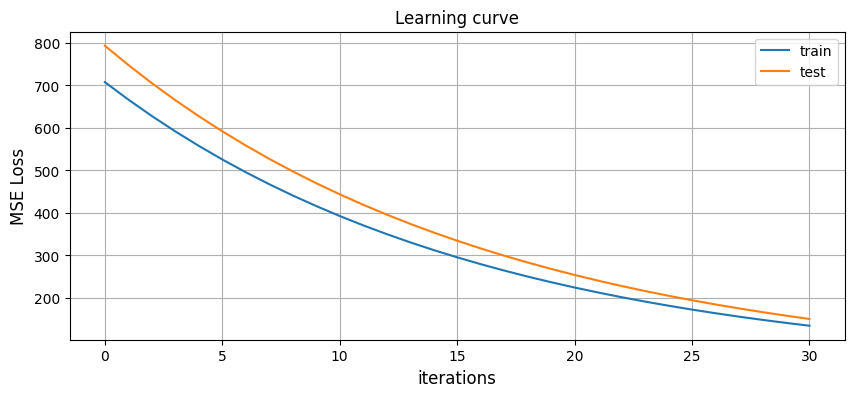

In [ ]:
plot_mse(mse_train, mse_test)

Модель недообучена — значения Loss не вышли на плато.

Посмотрим на **достаточно большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.027, iteration=15
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 12.80, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 7.60, Loss_train = 331.92, Loss_test = 300.22.
Iteration 3: w = 11.07, Loss_train = 164.92, Loss_test = 185.76.
Iteration 4: w = 8.76, Loss_train = 90.74, Loss_test = 65.14.
Iteration 5: w = 10.30, Loss_train = 57.79, Loss_test = 58.06.
Iteration 6: w = 9.27, Loss_train = 43.15, Loss_test = 23.93.
Iteration 7: w = 9.96, Loss_train = 36.65, Loss_test = 29.42.
Iteration 8: w = 9.50, Loss_train = 33.76, Loss_test = 18.09.
Iteration 9: w = 9.80, Loss_train = 32.48, Loss_test = 22.24.
Iteration 10: w = 9.60, Loss_train = 31.91, Loss_test = 17.96.
Iteration 11: w = 9.74, Loss_train = 31.66, Loss_test = 20.14.
Iteration 12: w = 9.65, Loss_train = 31.54, Loss_test = 18.39.
Iteration 13: w = 9.71, Loss_train = 31.49, Loss_test = 19.42.
Iteration 14: w = 9.67, Loss_train = 31.47, Loss_test = 18.67.
Iteration 15: w = 9.69, Loss_train = 31.46, Loss_test 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Шаг, получаемый умножением градиента на скорость обучения, получается достаточно большим, чтобы “перескочить” локальный минимум, но при этом модель все-таки попадает в него. Кривые обучения при этом успешно выходят на плато.

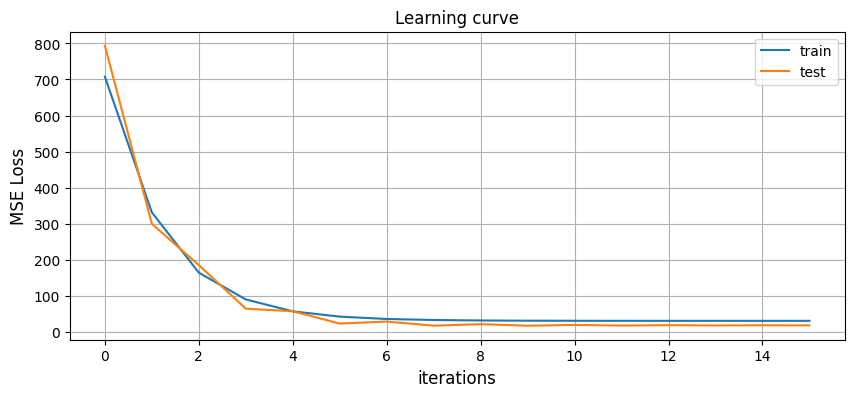

In [ ]:
plot_mse(mse_train, mse_test)

В финале посмотрим на **очень большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0],
    y_train,
    x_test[:, 0],
    y_test,
    w=5,
    alpha=0.034,
    iteration=5,
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 14.82, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 4.03, Loss_train = 847.72, Loss_test = 823.37.
Iteration 3: w = 15.89, Loss_train = 1016.53, Loss_test = 1132.95.
Iteration 4: w = 2.86, Loss_train = 1220.26, Loss_test = 1206.01.
Iteration 5: w = 17.17, Loss_train = 1466.11, Loss_test = 1624.33.


Шаг, который мы делаем, слишком большой. Мы не попадаем в локальный минимум.

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)


По кривым обучения видно, что модель не сошлась: ошибка растет.


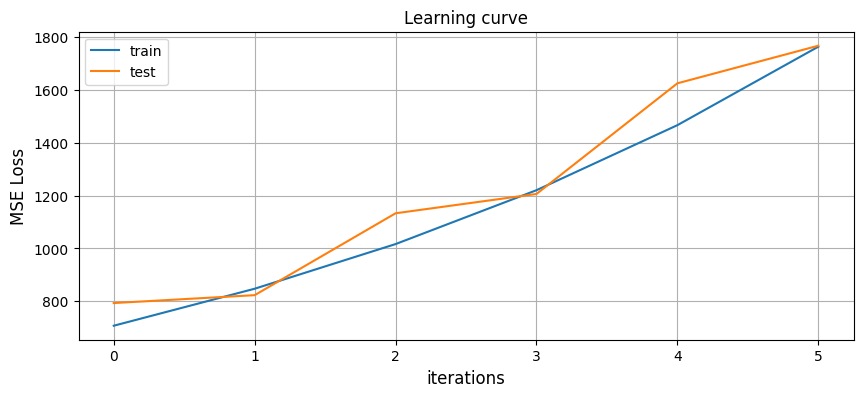

In [ ]:
plot_mse(mse_train, mse_test)

Выбор скорости обучения будет зависеть от модели и данных. В слудеющих лекциях вы познакомитесь с различными модификациями метода градиентного спуска и узнаете больше о выборе скорости обучения, а пока ориентируйтесь на кривые обучения.

## Единый подход к учету смещения

Пока мы настраивали только одну переменную, но даже в случае предсказания оценки по времени подготовки у нас две переменные: вес $w$ и смещение $b$.

Когда признаков станет больше, у нас получится “лапша” из слагаемых:
$$y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n$$

Нам бы хотелось записать их компактно, чтобы не усложнять код и использовать один и тот же код для данных с разным количеством признаков.  Для этого мы будем использовать матричное перемножение и трюк **“столбец единиц”**, который реализует **единый подход к учету смещения**.

Обозначим вектор-столбец из настраиваемых параметров:
$$\vec w = \begin{bmatrix}
b \\ w \\
\end{bmatrix}$$


In [ ]:
w = np.array([[0.5], [5]])
w

array([[0.5],
       [5. ]])

К матрице (в нашем случае был только один признак, поэтому у нас будет вектор-столбец) признаков слева "дорисуем" столбец единиц:
$$X = \begin{bmatrix}
1 & X \\
\end{bmatrix} =
\begin{bmatrix}
1 & 2.7 \\
1 & 3.3 \\
... & ...\\
1 & 9.2 \\
\end{bmatrix}$$

**Предупреждение:** добавлять столбец единиц нужно, только если вы сами пишете модель. **Если вы пользуетесь готовыми моделями, в этом нет необходимости.**


In [ ]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
x_test

array([[1. , 8.3],
       [1. , 2.5],
       [1. , 2.5],
       [1. , 6.9],
       [1. , 5.9]])

Матрицу $X$ можно матрично перемножить со столбцом $\vec w$, т.к количество столбцов $X$ совпадает с количеством строк в $\vec w$:

In [ ]:
x_train.shape, w.shape

((20, 2), (2, 1))

В общем случае:

$$\large \vec y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n = X\vec w $$  

Эту формулу можно свести к нескольким символам кода (`@` — матричное умножение):


In [ ]:
y_pred = x_test @ w
y_pred

array([[42.],
       [13.],
       [13.],
       [35.],
       [30.]])

## Необходимость нормализации

Реализуем многомерный градиентный спуск

In [ ]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [ ]:
def gradient(x, y, w):
    """Gradient of mean squared error."""
    return 2 * (x.T @ (x @ w) - x.T @ y) / len(x)


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w

        print(
            f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
            f"Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Попробуем обучить модель:

In [ ]:
w = np.array([[0.5], [5]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    0.01,
)

Iteration 0: b = 0.50, w = 5.00, Loss_train = 821.48, Loss_test = 915.80.
Iteration 1: b = 1.01, w = 8.12, Loss_train = 821.48, Loss_test = 915.80.
Iteration 2: b = 1.20, w = 9.26, Loss_train = 138.11, Loss_test = 152.87.
Iteration 3: b = 1.28, w = 9.68, Loss_train = 46.20, Loss_test = 41.48.
Iteration 4: b = 1.31, w = 9.84, Loss_train = 33.84, Loss_test = 23.27.
Iteration 5: b = 1.32, w = 9.89, Loss_train = 32.17, Loss_test = 19.64.
Iteration 6: b = 1.33, w = 9.91, Loss_train = 31.95, Loss_test = 18.72.
Iteration 7: b = 1.34, w = 9.92, Loss_train = 31.91, Loss_test = 18.44.
Iteration 8: b = 1.34, w = 9.92, Loss_train = 31.90, Loss_test = 18.35.
Iteration 9: b = 1.35, w = 9.92, Loss_train = 31.90, Loss_test = 18.31.
Iteration 10: b = 1.36, w = 9.92, Loss_train = 31.90, Loss_test = 18.30.


Мы не дошли до оптимальной прямой $y = 9.68x+2.83$, которую вычисляли выше.

При этом график Loss выглядит неплохо:

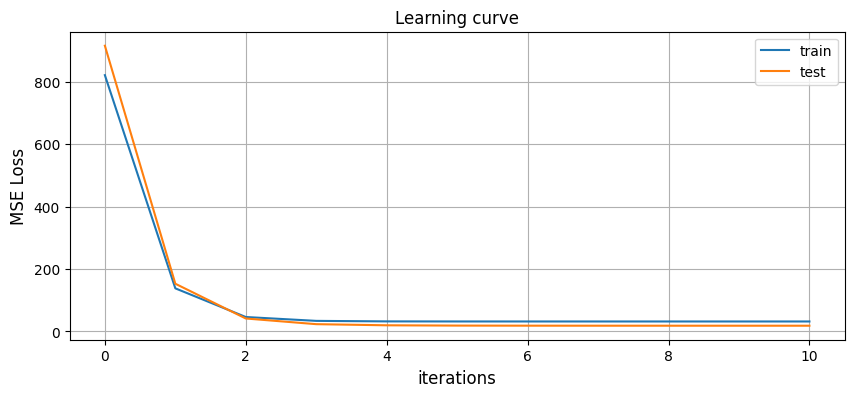

In [ ]:
plot_mse(mse_train, mse_test)

Такое поведение связано с ландшафтом функции потерь: значение ошибки по оси $b$ изменяется намного медленнее, чем по оси $w$.

In [ ]:
from interactive_visualization import plot_grid_search_2d

intercepts = np.arange(-7.5, 12.5, 0.1)  # b
slopes = np.arange(5, 15, 0.1)  # w
plot_grid_search_2d(x_train[:, 1], y_train, slopes, intercepts)

Поэтому основное изменение значений происходит вдоль оси $w$, а $b$ меняется слабо (значение $b$ далеко от ожидаемого).

In [ ]:
from interactive_visualization import plot_gradient_descent_2d

plot_gradient_descent_2d(
    x_train[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

Чтобы исправить ситуацию, применим `StandardScaler`:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(np.expand_dims(x_train[:, 1], axis=1)).flatten()
x_test_scaled = scaler.transform(np.expand_dims(x_test[:, 1], axis=1)).flatten()

In [ ]:
intercepts = np.arange(40, 60, 0.1)  # b
slopes = np.arange(15, 35, 0.1)  # w

plot_grid_search_2d(x_train_scaled, y_train, slopes, intercepts)

In [ ]:
x_train_scaled = np.hstack(
    (np.ones((len(x_train_scaled), 1)), np.expand_dims(x_train_scaled, axis=1)),
)

x_test_scaled = np.hstack(
    (np.ones((len(x_test_scaled), 1)), np.expand_dims(x_test_scaled, axis=1)),
)

Т.к. диапазоны x изменились, значения $w$ и $b$ тоже изменятся.


In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train_scaled, y_train, x_test_scaled, y_test, w, 0.35, iteration=10
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 1: b = 52.70, w = 26.86, Loss_train = 146.31, Loss_test = 108.53.
Iteration 2: b = 51.40, w = 25.01, Loss_train = 41.79, Loss_test = 21.10.
Iteration 3: b = 51.02, w = 24.46, Loss_train = 32.39, Loss_test = 17.36.
Iteration 4: b = 50.90, w = 24.29, Loss_train = 31.54, Loss_test = 18.27.
Iteration 5: b = 50.86, w = 24.24, Loss_train = 31.46, Loss_test = 18.72.
Iteration 6: b = 50.85, w = 24.23, Loss_train = 31.46, Loss_test = 18.88.
Iteration 7: b = 50.85, w = 24.23, Loss_train = 31.45, Loss_test = 18.92.
Iteration 8: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 9: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 10: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.


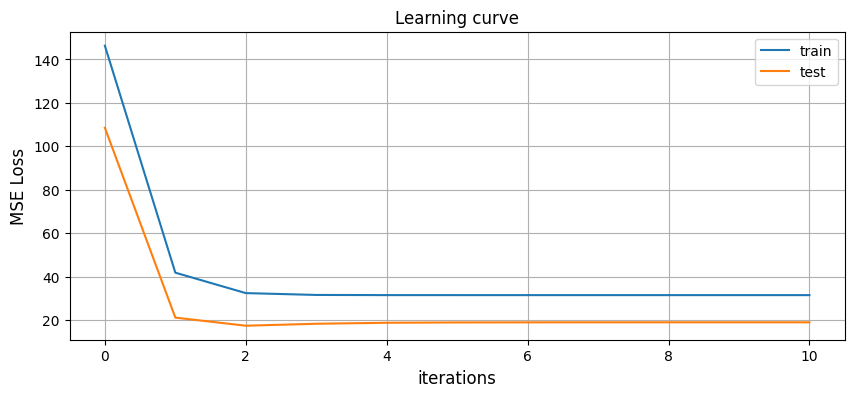

In [ ]:
plot_mse(mse_train, mse_test)

Проверим, что после нормализации мы сходимся к $y = 9.68x + 2.83$.  Для этого используем данные о матожидании и дисперсии из `StandardScaler`.

In [ ]:
b = ws[-1][0] - ws[-1][1] * scaler.mean_ / (scaler.var_) ** 0.5
w = ws[-1][1] / (scaler.var_) ** 0.5

print(f"y = {w[0]:.2f}x + {b[0]:.2f}")

y = 9.68x + 2.83


По визуализации видно, что $w$ и $b$ изменяются во время обучения.

In [ ]:
plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

## Еще немного о градиентном спуске

Антиградиент указывает в сторону наискорейшего убывания функции в данной точке. Поэтому логично начать с определенной точки, двигаться в направлении антиградиента, обновлять антиградиент и снова двигаться в этом направлении и так далее. Давайте запишем это более формально.

Пусть $w^{(0)}$ - начальный набор параметров (например, нулевой или сгенерированный из некоторого случайного распределения). Тогда градиентный спуск состоит из повторения следующих шагов до сходимости:

$$
w^{(k)} = w^{(k - 1)}    -
\eta_k
\nabla Q(w^{(k - 1)}).
$$

Здесь $Q(w)$ представляет собой значение функционала ошибки для набора параметров $w$.

Под $\eta_k$ понимается длина шага, которая контролирует скорость движения. Можно выбрать константную длину шага: $\eta_k = c$. Если длина шага слишком большая, есть риск "перепрыгивания" через точку минимума, а если слишком маленькая, движение к минимуму может занять слишком много итераций. Иногда длину шага уменьшают по мере движения - например, по простой формуле $$\eta_k = \frac{1}{k}$$.

В пакете "vowpal wabbit", который реализует настройку и применение линейных моделей, используется более сложная формула для шага в градиентном спуске:

$$
    \eta_k
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + k}
    \right)^p,
$$

где $\lambda$, $s_0$ и $p$ - параметры (мы опустили множитель, зависящий от номера прохода по выборке). На практике достаточно настроить параметр $\lambda$, а остальным присвоить разумные значения по умолчанию: $s_0 = 1$, $p = 0.5$, $d = 1$.

Останавливать итерационный процесс можно, например, при близости градиента к нулю~($\|\nabla Q(w^{(k-1)}\| < \varepsilon$)

или при слишком малом изменении вектора весов на последней итерации~ ($\|w^{(k)} - w^{(k-1)}\| < \varepsilon$).
Также неплохой идеей будет следить за ошибкой модели на отложенной выборке и останавливаться,
если эта ошибка перестала убывать.

Существует большое количество условий сходимости градиентного спуска.
Обычно они звучат примерно так **(Nesterov, Y. (2004). Introductory Lectures on Convex Optimization. // Springererlag US 2004.)**

: если функция выпуклая и дифференцируемая,
для её первой производной выполнено условие Липшица,
длина шага выбрана правильно (чем больше липшицева константа, тем меньше должен быть шаг),
то градиентный спуск сойдётся к минимуму функции.
Впрочем, теоретически обоснованную длину шага использовать сложно~--- липшицеву константу не всегда легко посчитать,
да и её выбор может дать слишком медленную сходимость.
Проще выбрать длину шага, исходя из качества получаемой модели на отложенной выборке.

Также имеет место следующая оценка сходимости для градиентного спуска:
$$
 Q(w^{(k)}) - Q(w^*)   =    O(\frac{1}{k}).
$$

Ничего не мешает использовать градиентный спуск и для минимизации невыпуклых функционалов.
Разумеется, гарантий в этом случае куда меньше: мы можем попасть в плохой локальный минимум или
вообще в седловую точку функционала.

## Оценивание градиента

Как правило, в задачах машинного обучения функционал~$Q(w)$ представим в виде суммы~$\ell$ функций:
$$
Q(w)     =     \frac{1}{\ell}     \sum_{i = 1}^{\ell}        q_i(w).
$$
В таком виде, например, записан функционал в задаче~
$$
\frac{1}{\ell}
    \left\|
        Xw - y
    \right\|^2
    \to
    \min_{w},
$$

где отдельные функции~$q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска~
$$
    w^{(k)}
    =
    w^{(k - 1)}
    -
    \eta_k
    \nabla Q(w^{(k - 1)}).
$$

 состоит в том,
что на каждом шаге необходимо вычислять градиент всей суммы~(будем его называть полным градиентом):
$$
  \nabla_w Q(w)    =    \frac{1}{\ell}    \sum_{i = 1}^{\ell}         \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки.
В то же время точное вычисление градиента может быть не так уж необходимо~---
как правило, мы делаем не очень большие шаги в сторону антиградиента,
и наличие в нём неточностей не должно сильно сказаться на общей траектории.
Опишем несколько способов оценивания полного градиента.



##Стохастический градиентный спуск

Оценить градиент суммы функций можно градиентом одного случайно взятого слагаемого:
$$
  \nabla_w Q(w)
   \approx
   \nabla_w q_{i_k}(w),
$$
где~$i_k$~ случайно выбранный номер слагаемого из функционала.
В этом случае мы получим метод~ **стохастического градиентного спуска** (stochastic gradient descent, SGD) **(Robbins, H., Monro S. (1951). A stochastic approximation method. // Annals of
Mathematical Statistics, 22 (3), p. 400-407.)**:
$$
    w^{(k)} = w^{(k - 1)} - \eta_k \nabla q_{i_k}(w^{(k - 1)}).
$$
У обычного градиентного спуска есть важная особенность:
чем ближе текущая точка к минимуму, тем меньше в ней градиент,
за счёт чего процесс замедляется и аккуратно попадает в окрестность минимума.
В случае со стохастическим градиентным спуском это свойство теряется.
На каждом шаге мы двигаемся в сторону, оптимальную с точки зрения уменьшения ошибки на одном объекте.
Параметры, оптимальные для средней ошибки на всей выборке, не обязаны являться оптимальными
для ошибки на одном из объектов.
Поэтому SGD метод запросто может отдаляться от минимума, даже оказавшись рядом с ним.
Чтобы исправить эту проблему, важно в SGD делать длину шага убывающей~---
тогда в окрестности оптимума мы уже не сможем делать длинные шаги и, как следствие,
не сможем из этой окрестности выйти.
Разумеется, потребуется выбирать формулу для длины шага аккуратно, чтобы не остановиться слишком рано
и не уйти от минимума.
В частности, сходимость для выпуклых дифференцируемых функций гарантируется (с вероятностью 1),
если функционал удовлетворяет ряду условий~(как правило, это выпуклость, дифференцируемость и липшицевость градиента)
и длина шага удовлетворяет условиям Роббинса-Монро:
$$
    \sum_{k = 1}^{\infty} \eta_k = \infty; \quad
    \sum_{k = 1}^{\infty} \eta_k^2 < \infty.
$$
Этим условиям, например, удовлетворяет шаг~$\eta_k = \frac{1}{k}$.
На практике сходимость с ним может оказаться слишком медленной,
поэтому правильнее будет подбирать формулу для длины шага более аккуратно.

Для выпуклого и гладкого функционала может быть получена
следующая оценка:
$$
    E \left[
        Q(w^{(k)}) - Q(w^*)
    \right]
    =
    O(1 / \sqrt{k}).
$$
Таким образом, метод стохастического градиента имеет менее
трудоемкие итерации по сравнению с полным градиентом,
но и скорость сходимости у него существенно меньше.

Отметим одно важное преимущество метода стохастического градиентного спуска.
Для выполнения одного шага в данном методе требуется вычислить градиент лишь одного слагаемого
а поскольку одно слагаемое соответствует ошибке на одном объекте,
то получается, что на каждом шаге необходимо держать в памяти всего один объект из выборки.
Данное наблюдение позволяет обучать линейные модели на очень больших выборках:
можно считывать объекты с диска по одному, и по каждому делать один шаг метода SGD.

Можно повысить точность оценки градиента, используя несколько слагаемых вместо одного:
$$
  \nabla_w Q(w)
   \approx
   \frac{1}{n}
   \sum_{j = 1}^{n}
   \nabla_w q_{i_{kj}}(w),
$$

где $i_{kj}$ случайно выбранные номера слагаемых из функционала ($j$ пробегает значения от $1$ до $n$),
а $n$  параметр метода, размер пачки объектов для одного градиентного шага.
С такой оценкой мы получим метод~mini-batch gradient descent,
который часто используется для обучения дифференцируемых моделей.



[[blog] ✏️ Пост о стохастическом градиентом спуске](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html#motivation-for-stochastic-gradient-descent)

До этого мы обучали модель, рассчитывая градиент по **всей train выборке**. Это не всегда возможно:
- данных может быть слишком много, чтобы загрузить их в память одновременно и рассчитать градиент,
- мы можем хотеть дообучать модель на свежепришедших данных, которых может быть немного.


Поэтому появляется идея **стохастического градиентного спуска**: мы можем делать шаг обучения, рассчитывая градиент не по всей выборке (**batch**), а по нескольким случайно выбранным объектам (**mini-batch**) или даже по одному случайно выбранному объекту (**stochastic**).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/define_size_of_batch.png" width="500"></center>

Можно [показать 📚[book]](https://academy.yandex.ru/handbook/ml/article/shodimost-sgd), что **стохастический** (с размером $\text{batch}=1$) **градиентный спуск сходится к минимуму (глобальному или локальному) функции потерь** с конечной точностью. Важным условием является **стохастичность**. Если мы будем использовать одну и ту же последовательность выборок, это приведет к накоплению ошибки и смещению результата.

Добавим создание подвыборки к нашему алгоритму:

In [ ]:
def stochastic_gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    alpha,
    iteration=10,
    batch_size=None,
):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        if not batch_size:
            x_sample = x_train
            y_sample = y_train
        else:
            indxs = np.random.choice(x_train.shape[0], batch_size)
            x_sample = x_train[indxs, :]
            y_sample = y_train[indxs, :]

        # adjust w based on gradient * learning rate
        grad = gradient(x_sample, y_sample, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w
        if (i + 1) % 10 == 0:
            print(
                f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
                f"Loss_train = {mse_train[i]:.2f}, "
                f"Loss_test = {mse_test[i]:3.2f}."
            )
    return ws, prediction, mse_train, dmse_train, mse_test

Чтобы сравнить результаты, будем использовать одни и те же количество итераций и скорость обучения. Чтобы компенсировать стохастичность, возьмем маленькое значение $\alpha$ и $100$ итераций.

Для всего train сета мы посчитаем градиент для $20\cdot100 = 2000$ точек.

In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=None,
)

f1 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
    mode="lines",
    title="Batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.94, w = 30.06, Loss_train = 86.54, Loss_test = 55.92.
Iteration 20: b = 53.57, w = 28.10, Loss_train = 55.80, Loss_test = 30.94.
Iteration 30: b = 52.66, w = 26.80, Loss_train = 42.22, Loss_test = 21.36.
Iteration 40: b = 52.05, w = 25.94, Loss_train = 36.21, Loss_test = 18.09.
Iteration 50: b = 51.65, w = 25.36, Loss_train = 33.56, Loss_test = 17.29.
Iteration 60: b = 51.38, w = 24.98, Loss_train = 32.38, Loss_test = 17.36.
Iteration 70: b = 51.20, w = 24.73, Loss_train = 31.87, Loss_test = 17.68.
Iteration 80: b = 51.08, w = 24.56, Loss_train = 31.64, Loss_test = 18.01.
Iteration 90: b = 51.01, w = 24.45, Loss_train = 31.54, Loss_test = 18.28.
Iteration 100: b = 50.95, w = 24.37, Loss_train = 31.49, Loss_test = 18.49.


Для стохастического градиентного спуска (размер $\text{batch}=1$) мы посчитаем градиент для $1\cdot100 = 100$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
ws_stohastic, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=1,
)
f2 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_stohastic,
    slopes,
    intercepts,
    mode="lines",
    title="Stochastic gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.17, w = 29.83, Loss_train = 74.29, Loss_test = 45.31.
Iteration 20: b = 54.43, w = 28.49, Loss_train = 62.91, Loss_test = 37.09.
Iteration 30: b = 52.67, w = 26.34, Loss_train = 42.71, Loss_test = 22.04.
Iteration 40: b = 51.48, w = 23.96, Loss_train = 32.13, Loss_test = 18.45.
Iteration 50: b = 52.13, w = 25.01, Loss_train = 33.79, Loss_test = 17.58.
Iteration 60: b = 51.83, w = 25.15, Loss_train = 33.67, Loss_test = 17.93.
Iteration 70: b = 52.79, w = 25.67, Loss_train = 37.54, Loss_test = 19.11.
Iteration 80: b = 51.72, w = 24.74, Loss_train = 32.47, Loss_test = 17.52.
Iteration 90: b = 51.25, w = 25.29, Loss_train = 32.72, Loss_test = 17.30.
Iteration 100: b = 50.82, w = 24.18, Loss_train = 31.49, Loss_test = 18.89.


Для стохастического спуска с $\text{mini-batch}=5$ мы посчитаем градиент для $5\cdot100=500$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
(
    ws_mini_batch,
    prediction,
    mse_train,
    dmse_train,
    mse_test,
) = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=5,
)
f3 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_mini_batch,
    slopes,
    intercepts,
    mode="lines",
    title="Mini-batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.89, w = 29.67, Loss_train = 79.49, Loss_test = 50.29.
Iteration 20: b = 53.54, w = 27.93, Loss_train = 52.77, Loss_test = 28.57.
Iteration 30: b = 52.28, w = 26.91, Loss_train = 42.28, Loss_test = 21.22.
Iteration 40: b = 51.72, w = 25.83, Loss_train = 35.69, Loss_test = 17.80.
Iteration 50: b = 51.10, w = 24.92, Loss_train = 32.10, Loss_test = 17.53.
Iteration 60: b = 50.84, w = 24.91, Loss_train = 32.06, Loss_test = 17.59.
Iteration 70: b = 51.04, w = 24.98, Loss_train = 32.12, Loss_test = 17.46.
Iteration 80: b = 51.28, w = 24.72, Loss_train = 31.93, Loss_test = 17.63.
Iteration 90: b = 51.03, w = 24.41, Loss_train = 31.56, Loss_test = 18.33.
Iteration 100: b = 50.85, w = 23.98, Loss_train = 31.48, Loss_test = 19.36.


Мы ищем минимум для всех данных.
- Градиент, рассчитанный по одному объекту, будет специфичен. Трек обучения  в случае стохастического градиентного спуска будет запутанным, а итоговая ошибка будет расти с увеличением скорости обучения (мы взяли низкую скорость).
- Градиент, рассчитанный по нескольким объектам будет давать лучшую оценку градиента для всех данных. Трек будет менее сложным.
- Градиент, рассчитанный по всей выборке, будет давать наиболее точное направление.

In [ ]:
from interactive_visualization import plot_panel

plot_panel(f1, f2, f3)

Для **ускорения расчетов** рекомендуется использовать **максимальный размер mini-batch**, который помещается в память, но это не всегда дает лучший результат. На следующих лекциях вы увидите, что для сложных моделей стохастичность, связанная с небольшим размером батча, может помочь выбраться из локального минимума и найти более глубокий.


## Метод SAG

В 2013 году был предложен **метод среднего стохастического градиента** (stochastic average gradient) **(Schmidt, M., Le Roux, N., Bach, F. (2013). Minimizing finite sums with the stochastic
average gradient. // Arxiv.org.)**,
который в некотором смысле сочетает низкую сложность итераций стохастического градиентного спуска
и высокую скорость сходимости полного градиентного спуска.
В начале работы в нём выбирается первое приближение~$w^0$,
и инициализируются вспомогательные переменные $z_i^0$,
соответствующие градиентам слагаемых функционала:
$$
    z_i^{(0)}
    =
    \nabla q_i(w^{(0)}),
    \qquad
    i = 1, \dots, \ell.
$$

На $k$-й итерации выбирается случайное слагаемое $i_k$ и
обновляются вспомогательные переменные:

$$
    z_i^{(k)}
    =
    \begin{cases}
        \nabla q_i(w^{(k - 1)}),
        \quad
        &\text{если}\ i = i_k;\\
        z_i^{(k - 1)}
        \quad
        &\text{иначе}.
    \end{cases}
$$

Иными словами, пересчитывается один из градиентов слагаемых.
Оценка градиента вычисляется как среднее вспомогательных переменных
то есть мы используем все слагаемые, как в полном градиенте,
но при этом почти все слагаемые берутся с предыдущих шагов, а не пересчитываются:
$$
   \nabla_w Q(w)
    \approx
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        z_i^{(k)}.
$$

Наконец, делается градиентный шаг:
$$
  w^{(k)}
    =
    w^{(k - 1)}
    -
    \eta_k
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
    z_i^{(k)}.
$$
Данный метод имеет такой же порядок сходимости для выпуклых и гладких функционалов,
как и обычный градиентный спуск:
$$
 E \left[
  Q(w^{(k)}) - Q(w^*)
  \right]
   =
 O(1 / k).
$$

Заметим, что для метода SAG требуется хранение последних вычисленных градиентов для всех объектов выборки.
В некоторых случаях этого можно избежать.
Например, в случае с линейными моделями функционал ошибки можно представить в виде
$$
 Q(w)
  =
 \frac{1}{\ell}
 \sum_{i = 1}^{\ell}
    q_i(\langle w, x_i \rangle).
$$

Градиент $i$-го слагаемого выглядит как
$$
    \nabla_w q_i(\langle w, x_i \rangle)
    =
    q_i^\prime(\langle w, x_i \rangle) x_i.
$$
Значит, нам достаточно для каждого объекта хранить число $q_i^\prime(\langle w, x_i \rangle)$
этого хватит для восстановления старого градиента.

Для уменьшения количества вычислений можно инициализировать $z_i^{(0)}$ нулями,
а не градиентами отдельных слагаемых из функционала ошибки.
В этом случае в формуле шага

$$
w^{(k)}    =
    w^{(k - 1)}
    -
    \eta_k
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
    z_i^{(k)}.
$$
 важно делить сумму  $z_i^{(k)}$
не на общее число объектов $\ell$, а на число объектов, чей градиент вычислялся хотя бы раз.
В противном случае на первых итерациях шаги будут очень маленькими.

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_function(X, y, w):
    n = X.shape[0]
    y_pred = sigmoid(np.dot(X, w))
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / n
    return loss

def sag(X, y, learning_rate=0.01, max_iter=1000, tol=1e-5):
    n, d = X.shape
    w = np.zeros(d)  # initialize weights
    gradient_memory = np.zeros((n, d))  # initialize gradient memory
    avg_gradient = np.mean(gradient_memory, axis=0)

    for _ in range(max_iter):
        prev_w = np.copy(w)
        for i in range(n):
            gradient = (sigmoid(np.dot(X[i], w)) - y[i]) * X[i]
            avg_gradient += (gradient - gradient_memory[i]) / n
            gradient_memory[i] = np.copy(gradient)
            w -= learning_rate * avg_gradient

        if np.linalg.norm(w - prev_w) < tol:
            break

    return w

# Generate some random data for demonstration
np.random.seed(42)
X = np.random.rand(100, 3)
y = np.random.randint(0, 2, 100)

# Add bias term to features
X = np.c_[np.ones(X.shape[0]), X]

# Run SAG for linear regression
weights = sag(X, y)

print("Weights:", weights)

Weights: [-0.50994926 -0.03332409  0.82976766  0.53338136]


In [ ]:
import numpy as np

def compute_gradient_i(X_i, y_i, w):
    prediction = np.dot(X_i, w)
    error = prediction - y_i
    error = np.array([error])  # Преобразование скаляра в массив
    gradient = X_i * error[:, np.newaxis]
    return gradient

def linear_regression_sag(X, y, learning_rate=0.01, num_epochs=1000):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)  # инициализация весов
    gradients = np.zeros((num_samples, num_features))  # инициализация градиентов
    average_gradient = np.mean(gradients, axis=0)  # средний градиент

    for epoch in range(num_epochs):
        new_average_gradient = np.zeros(num_features)  # создание нового массива для аккумулирования среднего градиента
        for i in range(num_samples):
            gradient_i = compute_gradient_i(X[i], y[i], w)
            new_average_gradient += gradient_i.flatten() / num_samples  # изменение размерности перед сложением
            gradients[i] = gradient_i.reshape(1, -1)  # Приведение к форме (1, num_features)

        w -= learning_rate * new_average_gradient

    return w

# Пример использования
X = np.array([[1, 2], [2, 3], [3, 4]])  # признаки
y = np.array([2, 3, 4])  # целевая переменная

optimal_params = linear_regression_sag(X, y)
print("Оптимальные параметры:", optimal_params)


Оптимальные параметры: [0.29355809 0.7965641 ]


## Другие подходы

Существует множество других способов получения оценки градиента.
Например, это можно делать без вычисления каких-либо градиентов вообще **(Flaxman, Abraham D. and Kalai, Adam Tauman and McMahan, H. Brendan (2005).
Online Convex Optimization in the Bandit Setting: Gradient Descent Without a
Gradient. // Proceedings of the Sixteenth Annual ACM-SIAM Symposium on Discrete
Algorithms.)**
достаточно взять случайный вектор $u$ на единичной сфере и домножить его
на значение функции в данном направлении:
$$
    \nabla_w Q(w)
    =
    Q(w + \delta u) u.
$$
Можно показать, что данная оценка является несмещённой для сглаженной версии функционала $Q$.

В задаче оценивания градиента можно зайти ещё дальше.
Если вычислять градиенты~$\nabla_w q_i(w)$ сложно,
то можно **обучить модель**, которая будет выдавать оценку градиента на основе текущих значений параметров.
Этот подход был предложен для обучения глубинных нейронных сетей  **(Jaderberg, M. et. al (2016). Decoupled Neural Interfaces using Synthetic Gradients. //
Arxiv.org.)**



## Модификации градиентного спуска

С помощью оценок градиента можно уменьшать сложность одного шага градиентного спуска,
но при этом сама идея метода не меняется мы движемся в сторону наискорейшего убывания функционала.
Конечно, такой подход не идеален, и можно по-разному его улучшать, устраняя те или иные его проблемы.
Мы разберём два примера таких модификаций одна будет направлена на борьбу с осцилляциями, а вторая
позволит автоматически подбирать длину шага.





### Метод инерции~(momentum).
Может оказаться, что направление антиградиента сильно меняется от шага к шагу.
Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня
он будет менять направление на почти противоположное на каждом шаге.
Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций.
Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов  в этом
случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения.
Введём для этого вектор инерции:
$$
\begin{align*}
    &h_0 = 0;\\
    &h_k = \alpha h_{k - 1} + \eta_k \nabla_w Q(w^{(k-1)}).
\end{align*}
$$
Здесь $\alpha$  параметр метода, определяющей скорость затухания градиентов с предыдущих шагов.
Разумеется, вместо вектора градиента может быть использована его аппроксимация.
Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w^{(k)} = w^{(k-1)} - h_k.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения
градиентов в векторе инерции эта координата окажется близкой к нулю.
Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты
в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.


In [ ]:
import numpy as np

def compute_gradient(X, y, w):
    predictions = np.dot(X, w)
    error = predictions - y
    gradient = np.dot(X.T, error) / len(y)
    return gradient

def linear_regression_momentum(X, y, learning_rate=0.01, alpha=0.9, num_iterations=1000):
    num_features = X.shape[1]
    w = np.zeros(num_features)  # инициализация весов
    velocity = np.zeros(num_features)  # инициализация вектора инерции

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, w)
        velocity = alpha * velocity + learning_rate * gradient
        w -= velocity

    return w

# Пример использования
X = np.array([[1, 2], [2, 3], [3, 4]])  # признаки
y = np.array([2, 3, 4])  # целевая переменная

optimal_params = linear_regression_momentum(X, y)
print("Оптимальные параметры:", optimal_params)

Оптимальные параметры: [0.00367845 0.99745083]



### AdaGrad и RMSprop.
Градиентный спуск очень чувствителен к выбору длины шага.
Если шаг большой, то есть риск, что мы будем <<перескакивать>> через точку минимума;
если же шаг маленький, то для нахождения минимума потребуется много итераций.
При этом нет способов заранее определить правильный размер шага к тому же,
схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров.
При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

$$
 G_{kj} = G_{k-1,j} + (\nabla_w Q(w^{(k-1)}))_j^2;\\
w_j^{(k)} = w_j^{(k-1)} - \frac{\eta_t}{\sqrt{G_{kj} + \varepsilon}} (\nabla_w Q(w^{(k-1)}))_j.
$$

Здесь $\varepsilon$  небольшая константа, которая предотвращает деление на ноль.
В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$)
и не подбирать её в процессе обучения.
Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю.
Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги;
если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт,
из-за чего шаги становятся всё медленнее и могут остановиться ещё до того,
как достигнут минимум функционала.
Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

In [ ]:
import numpy as np
def compute_gradient(X, y, w):
    # Вычисление предсказаний модели
    predictions = np.dot(X, w)

    # Вычисление ошибки предсказания
    error = predictions - y

    # Вычисление градиента целевой функции (среднеквадратичная ошибка)
    gradient = np.dot(X.T, error) / len(y)

    return gradient

def adagrad_optimizer(X, y, learning_rate=0.01, epsilon=1e-8):
    num_iterations = 1000
    num_features = X.shape[1]
    w = np.zeros(num_features)  # инициализация вектора параметров
    G = np.zeros(num_features)  # инициализация суммы квадратов градиентов

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, w)  # вычисление градиента
        G += gradient ** 2
        adjusted_gradient = gradient / (np.sqrt(G) + epsilon)
        w -= learning_rate * adjusted_gradient

    return w

# Пример использования
X = np.array([[1, 2], [2, 3], [3, 4]])  # признаки
y = np.array([1, 0, 1])  # целевая переменная

optimal_params = adagrad_optimizer(X, y)
print("Оптимальные параметры:", optimal_params)

Оптимальные параметры: [0.06136419 0.16134173]


### Adam.
Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.
Такой метод называется Adam **(Diederik P. Kingma and Jimmy Ba (2014). Adam: A Method for Stochastic
Optimization. // https://arxiv.org/abs/1412.6980)**.


Adam (Adaptive Moment Estimation) - это метод оптимизации, который сочетает в себе движение по экспоненциально убывающему скользящему среднему градиентов и их квадратов. Ниже приведены формулы для обновления параметров в методе Adam:

1. Инициализация:
   - $t = 0 $
   - $ \theta_0 $ - начальные параметры
   - $ m_0 = 0 $ - первый момент (ускорение градиента)
   - $ v_0 = 0 $ - второй момент (ускорение квадратов градиента)

2. Обновление на каждом шаге $t$:
   - $ t = t + 1 $
   - Вычисляем градиент по текущему мини-батчу: $$ g_t = \nabla_{\theta} J(\theta_{t-1}) $$
   - Обновляем первый момент: $$ m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t $$
   - Обновляем второй момент: $$ v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2 $$
   - Исправляем смещение первого момента: $$ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $$
   - Исправляем смещение второго момента: $$ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $$
   - Обновляем параметры: $$ \theta_t = \theta_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $$

Где:
- $ t$ - номер шага
- $ \theta_t$ - параметры на шаге $t$
- $ J(\theta) $ - функция потерь
- $ \alpha $ - скорость обучения (learning rate)
- $ \beta_1, \beta_2 $ - коэффициенты затухания для вычисления моментов
- $ \epsilon $ - малое число для численной стабильности

оэффициенты $ \beta_1 $ и $ \beta_2 $ в методе оптимизации Adam обычно выбираются заранее и являются гиперпараметрами модели. Обычно значения по умолчанию для них составляют 0.9 и 0.999 соответственно.

Однако, эти значения могут быть настроены в зависимости от конкретной задачи или данных. Обычно более высокие значения $\beta_1 $ могут сделать алгоритм более инерционным, в то время как более высокие значения $ \beta_2 $ могут сгладить изменения в адаптивной скорости обучения.

Выбор оптимальных значений для $ \beta_1 $ и $ \beta_2 $ может потребовать некоторого исследования и экспериментов на конкретной задаче или наборе данных для достижения лучших результатов.

In [ ]:
import numpy as np
def compute_gradient(X, y, w):
    # Вычисление предсказаний модели
    predictions = np.dot(X, w)

    # Вычисление ошибки предсказания
    error = predictions - y

    # Вычисление градиента целевой функции (среднеквадратичная ошибка)
    gradient = np.dot(X.T, error) / len(y)

    return gradient


def adam_optimizer(X, y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    num_iterations = 1000
    num_features = X.shape[1]
    w = np.zeros(num_features)  # инициализация вектора параметров
    m = np.zeros(num_features)  # инициализация первого момента
    v = np.zeros(num_features)  # инициализация второго момента

    for i in range(num_iterations):
        gradient = compute_gradient(X, y, w)  # вычисление градиента
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))

        w -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return w

# Пример использования
X = np.array([[1, 2], [2, 3], [3, 4]])  # признаки
y = np.array([1, 0, 1])  # целевая переменная

optimal_params = adam_optimizer(X, y)
print("Оптимальные параметры:", optimal_params)

Оптимальные параметры: [0.043118   0.17404353]


## Неградиентные методы
После прочтения этой главы у вас может сложиться ощущение, что приближённые способы решения ML задач и градиентные методы – это одно и тоже, но вы будете правы в этом только на 98%. В принципе, существуют и другие способы численно решать эти задачи, но в общем случае они работают гораздо хуже, чем градиентный спуск, и не обладают таким хорошим теоретическим обоснованием. Мы не будем рассказывать про них подробно, но можете на досуге почитать, скажем, про Stepwise regression, Orthogonal matching pursuit или LARS. У LARS, кстати, есть довольно интересное свойство: он может эффективно работать на выборках, в которых число признаков больше числа примеров. С алгоритмом LARS вы можете познакомиться в главе про оптимизацию.

## Полиномиальная модель

Полиномиальная модель - это модель в машинном обучении, которая использует полиномиальные функции для аппроксимации данных. Вместо линейной зависимости между признаками и целевой переменной, полиномиальная модель допускает более сложные нелинейные отношения.

Например, в случае простой линейной регрессии у нас есть модель вида $$ y = w_0 + w_1x$$, где $ x $ - это один признак. В полиномиальной модели мы можем использовать выражение вида $$ y = w_0 + w_1x + w_2x^2 + \ldots + w_nx^n,$$ где $ x^2, x^3, \ldots, x^n $ представляют собой степени признака $x$.

Полиномиальная регрессия может быть полезна, когда зависимость между признаками и целевой переменной не является линейной. Путем добавления степеней признаков в модель можно аппроксимировать сложные нелинейные зависимости, что позволяет более гибко моделировать данные.

Примеры применения полиномиальной модели включают моделирование кривых, аппроксимацию сложных функций и анализ данных, где линейная модель недостаточно точна для описания взаимосвязей между переменными.

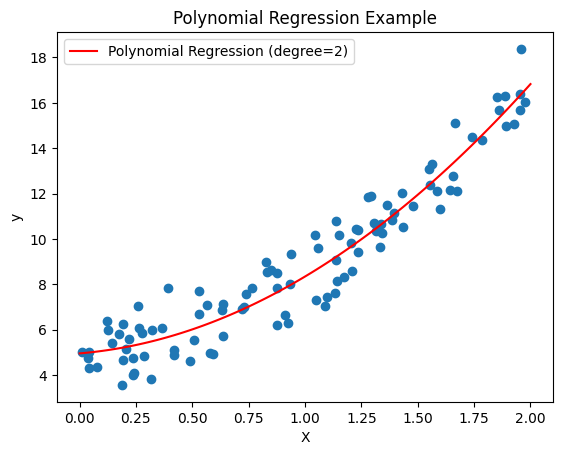

In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt

# Генерируем случайные данные
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X**2 + 5 + np.random.randn(100, 1)

# Построение полиномиальной модели
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Визуализация данных и полиномиальной модели
X_new = np.linspace(0, 2, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, color='red', label='Polynomial Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

# Практические особенности работы с линейными моделями

## Нормализация данных

Мы уже обсудили, зачем нужна нормализация данных для линейной модели. В данном разделе мы обсудим виды нормализации более подробно.

Загрузим датасет с образцами здоровой и раковой ткани. Датасет состоит из 569 примеров, где каждой строчке из 30 признаков соответствует класс `1` злокачественной (*malignant*) или `0` доброкачественной (*benign*) ткани. Задача состоит в том, чтобы по 30-ти признакам обучить модель определять тип ткани (злокачественная или доброкачественная).


In [ ]:
import sklearn.datasets

cancer = sklearn.datasets.load_breast_cancer()  # load data

x = cancer.data  # features
y = cancer.target  # labels(classes)
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x[0]: \n {x[0]}")
print(f"y[0]: \n {y[0]}")

x shape: (569, 30), y shape: (569,)
x[0]: 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
y[0]: 
 0


Быстрее и удобнее можно посмотреть на данные, используя pandas. К тому же Colab добавил возможность визуализации данных (для этого можно тыкнуть синий значок диаграммы ▆ █ ▄  справа от таблицы):

In [ ]:
import pandas as pd

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Colab делает не полную визуализацию признаков, но и на данных изображениях можно найти полезную **информацию о выбросах** (из графика **Values**), **плотности распределений** (из графика **Distributions**) и о наличии **зависимости между переменными** (из графика **2-d distributions**). Например, мы можем увидеть, что значения признаков *mean area* и *mean perimeter* имеют зависимость, близкую к линейной, что не очень хорошо (почему, обсудим позже).

Кроме того, можно тыкнуть на рисунок, посмотреть и скопировать код визуализации, чтобы применить к другим данным или изменить под свои нужды.

Теперь давайте посмотрим на сами данные. У нас есть 569 строк, в каждой из которой по 30 колонок. Такие колонки называют признаками или *features*. Попробуем математически описать все эти признаки (mean, std, min и тд).

In [ ]:
cancer_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

То же самое, но в виде графика. Видно, что у фич совершенно разные диапазоны  значений.

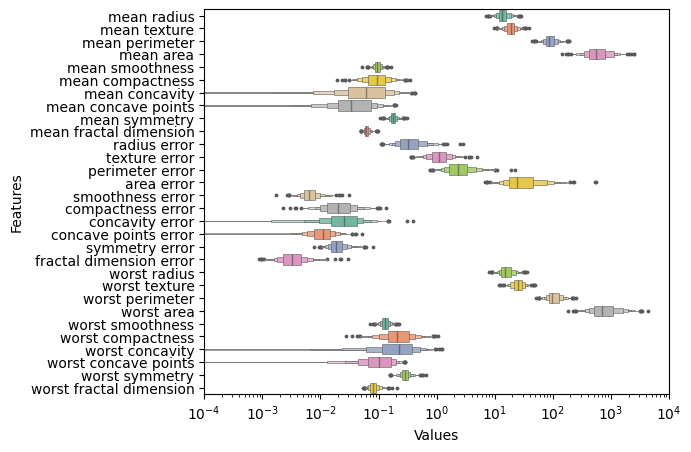

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=cancer_df,
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xscale="log", xlim=(1e-4, 1e4), xlabel="Values", ylabel="Features")
plt.show()

Линейная модель представляет собой **сумму взвешенных признаков**. Если мы приведем признаки к **единому масштабу**, мы сможем **оценить их вклад в модель** по значениям весов. Кроме того, работать с признаками в одном диапазоне вычислительно удобно. Для этого будем использовать нормализацию.


### Выбор Scaler

**Нормализацией** называется процедура приведения входных данных к **общим значениям математических статистик**.

Нормализация строит **взаимно однозначное соответствие** между некоторыми размерными величинами (которые измеряются в метрах, килограммах, годах и т. п.) и их безразмерными аналогами. Исходные значения **можно восстановить**, зная статистики оригинальных данных и правило, по которому делалась нормализация.  


Часто используют следующие варианты нормализации:  **`MinMaxScaler`**, **`StandardScaler`**, **`RobustScaler`**.

Идея **`MinMaxScaler`** заключается в том, что он преобразует данные из имеющегося диапазона значений в диапазон от $0$ до $1$. Может быть полезно, если нужно выполнить преобразование, в котором отрицательные значения не допускаются (например, масштабирование RGB пикселей).

$$\large z_i=\frac{X_i-X_{min}}{X_{max}-X_{min}},$$

где $z_i$ — масштабированное значение, $X_i$ — текущее значение, $X_{min}$ и $X_{max}$ — минимальное и максимальное значения имеющихся данных.

Идея **`StandardScaler`** заключается в том, что он преобразует данные таким образом, что распределение будет иметь среднее значение $0$ и стандартное отклонение $1$. Большинство значений будет находиться в диапазоне от $-1$ до $1$. Это стандартная трансформация, и она применима во многих ситуациях.

$$\large z_i=\frac{X_i-u}{s},$$

где $u$ — среднее значение (или $0$ при `with_mean=False`), $s$ — стандартное отклонение (или $0$ при `with_std=False`).

И `StandardScaler`, и `MinMaxScaler` чувствительны к наличию выбросов. **`RobustScaler`** использует медиану и основан на *процентилях*. k-й процентиль — это величина, равная или не превосходящая k процентов чисел во всём имеющемся распределении. Например, 50-й процентиль (медиана) распределения таков, что 50% чисел из распределения не меньше данного числа.

Соответственно, `RobustScaler` не зависит от небольшого числа очень больших предельных выбросов (outliers). Следовательно, результирующий диапазон преобразованных значений признаков больше, чем для предыдущих скэйлеров и, что более важно, примерно одинаков.

$$\large z_i=\frac{X_i-X_{median}}{IQR},$$

где $X_{median}$ — значение медианы, $IQR$ — межквартильный диапазон, равный разнице между 75-ым и 25-ым процентилями.

Сравним `MinMaxScaler`, `StandardScaler`, `RobustScaler` для случайного набора признаков.

In [ ]:
import random

random.seed(0)
random_names = random.sample(list(cancer.feature_names), 8)
cut_df = cancer_df[random_names]

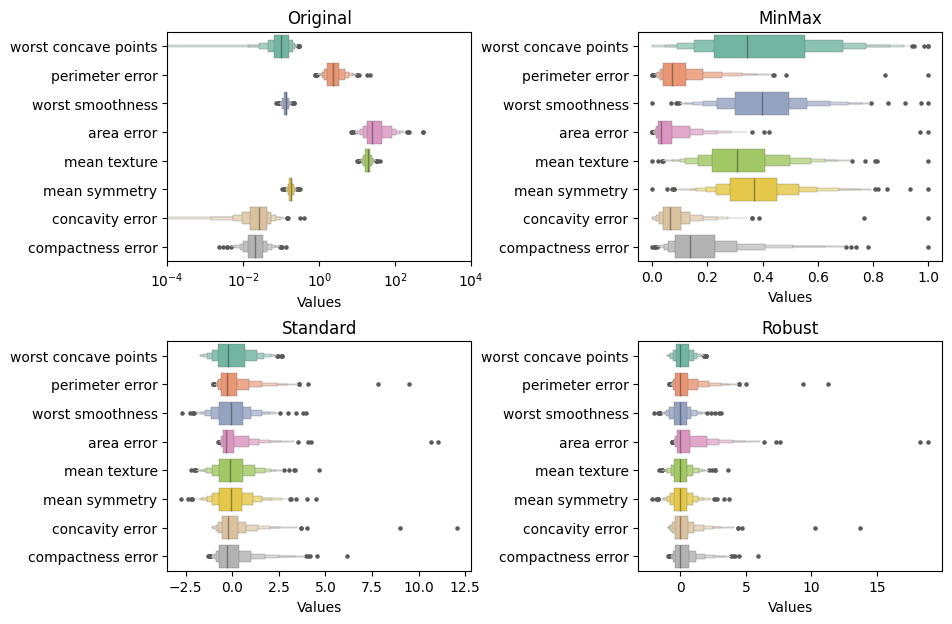

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


def plot_norm(df, ax, title):
    sns.boxenplot(
        df,
        orient="h",
        palette="Set2",
        ax=ax,
        linewidth=0.2,
        flier_kws={"marker": "o", "s": 5},
        line_kws={"linewidth": 1},
    )
    ax.set(xlabel="Values", title=title)


fig, axs = plt.subplots(2, 2, figsize=(10, 7))

plot_norm(cut_df, axs[0][0], "Original")
axs[0][0].set(xscale="log", xlim=(1e-4, 1e4))

min_max_x = MinMaxScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(min_max_x, columns=random_names), axs[0][1], "MinMax")

std_x = StandardScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(std_x, columns=random_names), axs[1][0], "Standard")

rob_x = RobustScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(rob_x, columns=random_names), axs[1][1], "Robust")

plt.subplots_adjust(wspace=0.55, hspace=0.35)

plt.show()

Перед выбором нормализации важно разобраться с природой выбросов. Для этого на выбросы нужно посмотреть с точки зрения эксперта и попробовать определить, являются ли выбросы ошибкой при сборе данных или редкими случаями, которые необходимо сохранить.

Мы не являемся экспертами в медицине и мало знаем о данных, поэтому будем считать, что наши признаки имеют распределение, близкое к нормальному. Поэтому мы будем использовать `StandardScaler`. `StandardScaler` часто используют как нормировку по умолчанию.

In [ ]:
x_norm = StandardScaler().fit_transform(cancer_df)  # scaled data

Видим, что они стали намного более сравнимы между собой.

In [ ]:
pd.DataFrame(x_norm, columns=cancer.feature_names).describe()

mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.153111e-15 -6.568462e-15   -6.993039e-16 -8.553985e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.081447e-15     -1.136369e-15   -2.997017e-16         1.023981e-15   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean   -1.860648e-15           -1.504752e-15  ... -2.297713e-15   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       worst texture  worst perimeter    worst area  worst smoothness  \
count   5.690000e+02     5.690000e+02  5.690000e+02      5.690000e+02   
mean    1.742016e-15    -1.198807e-15  6.118909e-16     -5.094929e-15   
std     1.000880e+00     1.000880e+00  1.000880e+00      1.000880e+00   
min    -2.223994e+00    -1.693361e+00 -1.222423e+00     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01 -6.421359e-01     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01 -3.411812e-01     -4.684277e-02   
75%     6.583411e-01     5.402790e-01  3.575891e-01      5.975448e-01   
max     3.885905e+00     4.287337e+00  5.930172e+00      3.955374e+00   

       worst compactness  worst concavity  worst concave points  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -2.122887e-15     6.118909e-16         -1.998011e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       worst symmetry  worst fractal dimension  
count    5.690000e+02             5.690000e+02  
mean    -2.422589e-15             2.497514e-15  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

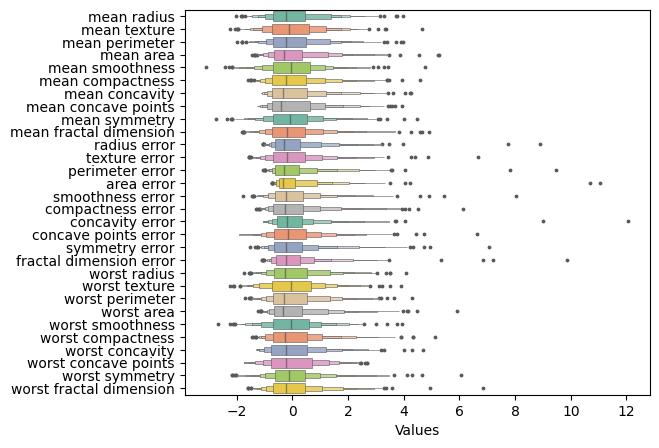

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=pd.DataFrame(x_norm, columns=cancer.feature_names),
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xlabel="Values")
plt.show()

## Проблема корреляции признаков  в случае линейных моделей

Часто может оказаться, что признаковое описание объекта избыточно и между различными признаками имеются связи. Для устойчивости работы линейных моделей важно, чтобы среди признаков не было скоррелированных пар.

Например, если мы будем решать задачу регрессии на наборе признаков $x_1 \dots x_n$, среди которых есть связь $x_2 = 5 x_1$, и возьмём линейную модель вида
$$\large y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,$$
то с учётом данной связи мы можем записать:
$$\large y = w_1 x_1 + w_2 (5x_1) + \dots + w_n x_n + b = (w_1 + 5 w_2) x_1 +  w_3 x_3 + \dots + w_n x_n + b.$$

Таким образом, наша модель теперь учитывает признак $x_1$ с одним "общим" весом $(w_1 + 5 w_2)$, несмотря на то, что он закодирован двумя независимыми параметрами. Решение, то есть набор весовых коэффициентов $w_i$, перестало быть единственным, так как мы теперь можем делать произвольные преобразования с числами $w_1$ и $w_2$ до тех пор, пока $(w_1 + 5 w_2)$ остаётся неизменным:

$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000 ,\, w_2 \rightarrow  w_2 - 1000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000 ,\, w_2 \rightarrow  w_2 - 1000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000 ,\, w_2 \rightarrow  w_2 - 1000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000000 ,\, w_2 \rightarrow  w_2 - 1000000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + Nan ,\, w_2 \rightarrow  w_2 + Nan\}$$

**Чем это плохо?**

В случае корреляции признаков задача не имеет единственного решения и не существует обратной матрицы, обеспечивающей аналитическое решение. Мы можем использовать градиентные методы (поговорим позже) для поиска решения, но
при этом веса модели могут неконтролируемо расти. При этом **суммарный вклад** признаков может быть **мал**.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem1.png" width="700">

Мы можем оценивать **важность признаков в линейной модели**, используя **веса** перед ними (признаки должны быть нормализованы). Чем больше модуль веса, тем больше вклад. Для коррелированных признаков важность будет переоценена.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem2.png" width="700">

Кроме того, нужно помнить, что диапазоны числовых переменных ограничены. При неконтролируемом росте весов значение может выйти за диапазон и превратиться в ~~тыкву~~ `Nan`.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem3.png" width="700">

**Что делать?**

Визуализировать подобные зависимости можно при помощи построения матрицы попарных корреляций признаков:

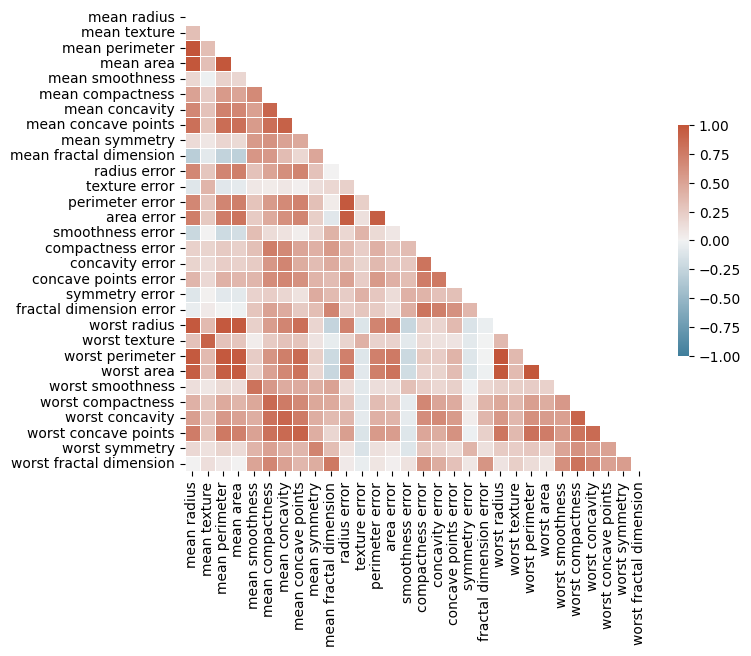

In [ ]:
import numpy as np

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Compute the correlation matrix
corr = cancer_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.show()

В наших данных сильно скоррелированы признаки, характеризующие размеры опухоли (мы могли видеть это выше при визуализации 2-d distributions).

В случае корреляции можно:
- **добавить регуляризацию** (о том, что такое регуляризация, мы поговорим дальше);
- **оставить один признак**;
- если есть вероятность, что при удалении признаков часть информации будет потеряна, можно оставить **один признак** неизменным и вычесть его из остальных (оставить только **разницу**). Неинформативные шумовые признаки можно удалить (как это делать, вы узнаете на 4-й лекции).


## Практика

 **Задача**: Предсказание стоимости квартиры на основе её площади.

**Дано**: Данные о площади квартиры и её цене.

| Площадь (кв.м) | Цена (тыс. долларов) |
|----------------|----------------------|
| 50             | 200                  |
| 70             | 300                  |
| 90             | 400                  |
| 110            | 500                  |
| 130            | 600                  |
| 150            | 700                  |
| 170            | 800                  |
| 190            | 900                  |
| 210            | 1000                 |
| 230            | 1100                 |
| 250            | 1200                 |
| 270            | 1300                 |
| 290            | 1400                 |
| 310            | 1500                 |
| 330            | 1600                 |
| 350            | 1700                 |
| 370            | 1800                 |
| 390            | 1900                 |
| 410            | 2000                 |
| 430            | 2100                 |
| 450            | 2200                 |
| 470            | 2300                 |
| 490            | 2400                 |
| 510            | 2500                 |
| 530            | 2600                 |

**Цель**: Разработать модель, которая будет предсказывать стоимость квартиры на основе её площади, чтобы потенциальные покупатели и продавцы могли оценить цену недвижимости более точно.

Для решения задачи предсказания стоимости квартиры на основе её площади с использованием метода наименьших квадратов в Python, вам потребуется библиотека numpy для работы с матрицами.

[450.]


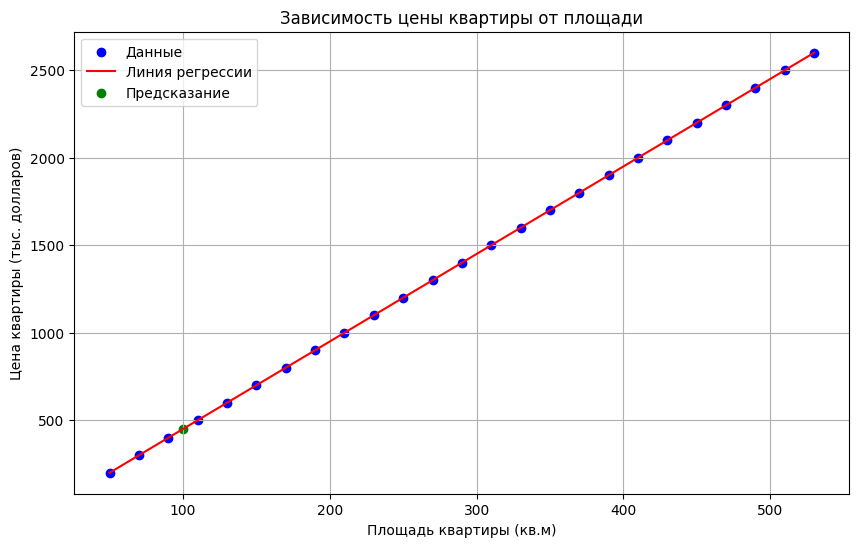

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Создание DataFrame с данными о площади квартиры и цене
data = {
    'Площадь': [50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530],
    'Цена': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600]
}

df = pd.DataFrame(data)

# Применяем метод наименьших квадратов для поиска коэффициентов модели y = w0 + w1*x
X = np.vstack([np.ones(len(df['Площадь'])), df['Площадь']]).T
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(df['Цена'])
w0 = w[0]
w1 = w[1]

# Предсказание стоимости квартиры для новых значений площади
new_area = np.array([100])  # Пример новой площади для предсказания
predicted_price = w0 + w1 * new_area
print(predicted_price)
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df['Площадь'], df['Цена'], color='blue', label='Данные')
plt.plot(df['Площадь'], w0 + w1*df['Площадь'], color='red', label='Линия регрессии')
plt.scatter(new_area, predicted_price, color='green', label='Предсказание')
plt.xlabel('Площадь квартиры (кв.м)')
plt.ylabel('Цена квартиры (тыс. долларов)')
plt.title('Зависимость цены квартиры от площади')
plt.legend()
plt.grid(True)
plt.show()

Для использования линейной регрессии из библиотеки scikit-learn воспользуйтесь следующим кодом:

Предсказание стоимости квартиры для новой площади:  [450.]


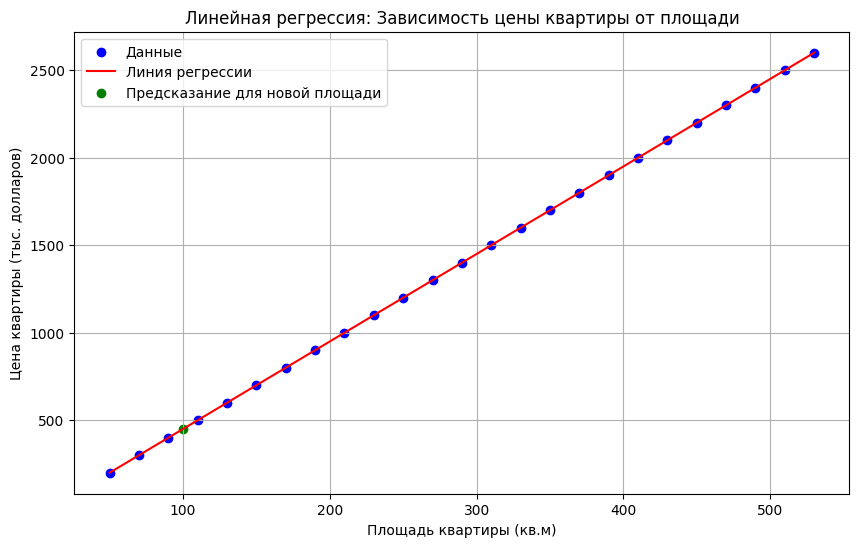

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Создание DataFrame с данными о площади квартиры и цене
data = {
    'Площадь': [50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530],
    'Цена': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600]
}

df = pd.DataFrame(data)

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучение модели на данных
X = df['Площадь'].values.reshape(-1, 1)
y = df['Цена'].values
model.fit(X, y)

# Предсказание стоимости квартиры для новой площади
new_area = np.array([[100]])
predicted_price = model.predict(new_area)
print("Предсказание стоимости квартиры для новой площади: ",predicted_price)
# Визуализация данных и линии регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Данные')
plt.plot(X, model.predict(X), color='red', label='Линия регрессии')
plt.scatter(new_area[0], predicted_price[0], color='green', label='Предсказание для новой площади')
plt.xlabel('Площадь квартиры (кв.м)')
plt.ylabel('Цена квартиры (тыс. долларов)')
plt.title('Линейная регрессия: Зависимость цены квартиры от площади')
plt.legend()
plt.grid(True)
plt.show()

Теперь приведем пример многомерной регрессиии:

| Площадь квартиры (кв.м) | Количество комнат | Расстояние до центра (км) | Этаж | Цена (тыс. долларов) |
|------------------------|------------------|------------------------|------|----------------------|
| 70                     | 2                | 5                        | 3    | 250                  |
| 85                     | 3                | 10                       | 5    | 320                  |
| 60                     | 1                | 3                        | 2    | 200                  |
| 100                    | 4                | 15                       | 7    | 400                  |
| 75                     | 2                | 8                        | 4    | 280                  |
| 90                     | 3                | 12                       | 6    | 350                  |
| 55                     | 1                | 2                        | 1    | 190                  |
| 80                     | 2                | 6                        | 3    | 270                  |
| 95                     | 3                | 11                       | 5    | 380                  |
| 65                     | 1                | 4                        | 2    | 210                  |
| 110                    | 4                | 18                       | 8    | 420                  |
| 78                     | 2                | 7                        | 4    | 290                  |
| 88                     | 3                | 13                       | 6    | 360                  |
| 58                     | 1                | 3                        | 1    | 195                  |
| 82                     | 2                | 9                        | 3    | 275                  |
| 92                     | 3                | 14                       | 5    | 370                  |
| 68                     | 1                | 5                        | 2    | 220                  |
| 105                    | 4                | 16                       | 7    | 410                  |
| 77                     | 2                | 8                        | 4    | 285                  |
| 87                     | 3                | 12                       | 6    | 355                  |
| 59                     | 1                | 4                        | 1    | 200                  |
| 75                     | 2                | 10                       | 3    | 260                  |
| 98                     | 3                | 15                       | 5    | 375                  |
| 70                     | 1                | 6                        | 2    | 230                  |


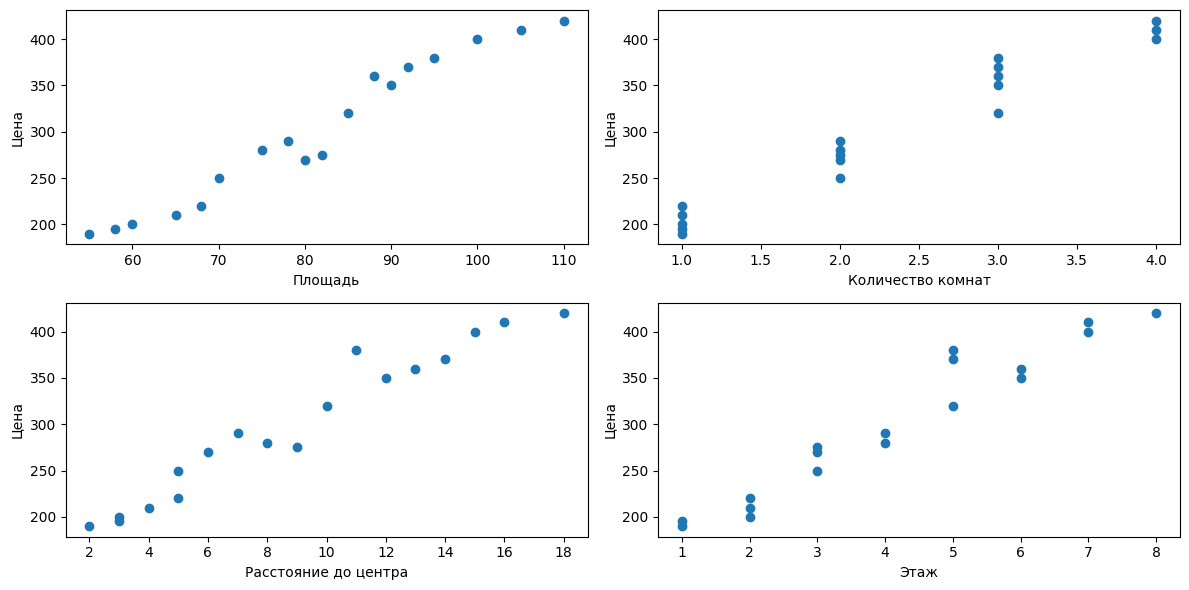

Коэффициенты регрессии:
Площадь: 1.8153979333709225
Количество комнат: 24.46717692081247
Расстояние до центра: 3.1814462411998647
Этаж: 3.5764857326753985
Предсказанная цена квартиры: [344.33398362]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Создание исходных данных
data = {
    'Площадь': [70, 85, 60, 100, 75, 90, 55, 80, 95, 65, 110, 78, 88, 58, 82, 92, 68, 105],
    'Количество комнат': [2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4],
    'Расстояние до центра': [5, 10, 3, 15, 8, 12, 2, 6, 11, 4, 18, 7, 13, 3, 9, 14, 5, 16],
    'Этаж': [3, 5, 2, 7, 4, 6, 1, 3, 5, 2, 8, 4, 6, 1, 3, 5, 2, 7],
    'Цена': [250, 320, 200, 400, 280, 350, 190, 270, 380, 210, 420, 290, 360, 195, 275, 370, 220,410]
}

df = pd.DataFrame(data)

# Визуализация данных
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.scatter(df['Площадь'], df['Цена'])
plt.xlabel('Площадь')
plt.ylabel('Цена')

plt.subplot(2,2,2)
plt.scatter(df['Количество комнат'], df['Цена'])
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

plt.subplot(2,2,3)
plt.scatter(df['Расстояние до центра'], df['Цена'])
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')

plt.subplot(2,2,4)
plt.scatter(df['Этаж'], df['Цена'])
plt.xlabel('Этаж')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()

# Решение задачи предсказания с использованием многомерной линейной регрессии
X = df.drop('Цена', axis=1)
y = df['Цена']

model = LinearRegression()
model.fit(X,y)

# Вывод коэффициентов регрессии
print('Коэффициенты регрессии:')
for feature_name, coef in zip(X.columns, model.coef_):
    print(f'{feature_name}: {coef}')

# Новые данные для предсказания
new_data = {
    'Площадь': [95],
    'Количество комнат': [3],
    'Расстояние до центра': [10],
    'Этаж': [4]
}

new_df = pd.DataFrame(new_data)

# Предсказание цены для новых данных
predicted_price = model.predict(new_df)
print("Предсказанная цена квартиры:", predicted_price)

## Литература

<font size="5">Линейная регрессия</font>

* [[book] 📚 Метрики классификации и регрессии](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)
* [[blog] ✏️ Стратификация данных в задаче регрессии (недоступно в РФ)](https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079), [код](https://datascience.stackexchange.com/questions/33140/stratify-on-regression)

* [[blog] ✏️ A Complete Guide to Matrix Notation and Linear Regression](https://aunnnn.github.io/ml-tutorial/html/blog_content/linear_regression/linear_regression_tutorial.html)


<font size="5">Метод градиентного спуска</font>
* [[book] 📚 Градиентный спуск](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter1_gradient-descent.html)
* [[book] 📚 Стохастический градиентный спуск](tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html)

<font size="5">Обобщенные линейные модели</font>
* [[blog] ✏️ Дуальная форма SVM](https://www.geeksforgeeks.org/dual-support-vector-machine/)
* [[git] 🐾 Продвинутый алгоритм, основанный на SVM](https://github.com/IvanoLauriola/MKLpy)

<font size="5">Вероятностный подход в задаче классификации</font>
* [[video] 📺 Naive Bayes in NLP](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
* Latent Dirichlet Allocation:
 * [[video] 📺 Latent Dirichlet Allocation (Part 1 of 2)](https://www.youtube.com/watch?v=T05t-SqKArY),
 * [[video] 📺 Training Latent Dirichlet Allocation: Gibbs Sampling (Part 2 of 2)](https://www.youtube.com/watch?v=BaM1uiCpj_E).
* [[video] 📺 Объяснение SoftMax от StatQuest](https://www.youtube.com/watch?v=KpKog-L9veg)
* [[video] 📺 Объяснение KL Divergence](https://www.youtube.com/watch?v=SxGYPqCgJWM)
* [[blog] ✏️ Расчет Cross-Entropy в задаче классификации (недоступно в РФ)](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451)